<center>

# DENGUE EN ARGENTINA Y SU RELACIÓN CON VARIABLES METEOROLÓGICAS

</center>    

### OBJETIVOS:
- Analizar la incidencia de dengue en las diferentes provincias de Argentina desde el año 2018 al 2023.
- Evaluar la relación entre variables meteorológicas en la propagación de dicha enfermedad.
- Identificar si existen patrones estacionales en la incidencia de dengue en Argentina.
- Desarrollar modelos que nos permitan predecir la incidencia futura de dengue basados en datos históricos de la enfermedad y variables meteorológicas.

### HIPÓTESIS:
Existe una asociación significativa entre las variables meteorológicas (temperatura, humedad y la precipitación) y la incidencia del dengue en Argentina. La incidencia del dengue varía significativamente según la estación del año, con un aumento en los casos durante los períodos más cálidos y húmedos. La incidencia del dengue varía significativamente entre regiones con diferentes condiciones climáticas y demográficas.

### RECURSOS:
Se utilizaron datos abiertos de la nación Argentina, publicados por el ministerio de salud, el ministerio de defensa y el Servicio Meteorológico Nacional (SMN). Páginas:
- https://datos.gob.ar/dataset/salud-vigilancia-enfermedades-por-virus-dengue-zika
- https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/DivisionPolitica
- https://www.smn.gob.ar/


#### <span style="color:blue"> DIPLOMATURA EN CIENCIA DE DATOS CON R y PYTHON</span>
- <span style="color:blue">Alumna: Agustina Giuliodori</span>
- <span style="color:blue">Tutor: Julio Paredes</span>

## INTRODUCCIÓN

Según la Organización Mundial de la Salud (OMS):

- El dengue es una **infección vírica** (arbovirus) que se transmite al ser humano por la picadura de mosquitos infectados.
- En la actualidad, cerca de la mitad de la población mundial corre riesgo de contraerlo y cada año se producen **entre 100 y 400 millones de infecciones**.
- El dengue se presenta en los **climas tropicales y subtropicales** de todo el planeta, sobre todo en las zonas urbanas y semiurbanas.
- Aunque muchas infecciones por el virus del dengue son asintomáticas o provocan cuadros leves, en ocasiones se dan casos graves, e incluso mortales.
- Las personas con dengue leve reciben tratamiento para el dolor. Las personas con dengue grave necesitan ser hospitalizadas.
- La prevención y control del dengue se basan en el **control de sus vectores**. No hay un tratamiento específico para el dengue y el dengue grave, pero la detección precoz y el acceso a una atención médica adecuada reducen en gran medida las tasas de letalidad del dengue grave.


Cuando aparecen **síntomas**, lo suelen hacer entre 4 y 10 días después de la infección y duran de 2 a 7 días. Lo síntomas pueden ser:
- Fiebre elevada (40° C/104° F)
- Cefalea intensa
- Dolor detrás de los ojos, muscular y articular
- Náuseas y/o vómitos
- Agrandamiento de ganglios linfáticos
- Erupciones cutáneas.

En las últimas décadas **ha aumentado enormemente la incidencia del dengue en el mundo**: los casos notificados a la OMS han pasado de 0.5 millones (año 2000) a 5 millones en (año 2019). La globalización, el comercio, la urbanización, los viajes, los cambios demográficos, el suministro doméstico de agua inadecuado y el aumento de las temperaturas están asociados con la propagación de los principales vectores **Aedes aegypti** (originario de África) y **Aedes albopictus** (originario de Asia). El **cambio climático** puede conducir a cambios en la transmisión del dengue por múltiples mecanismos interrelacionados. La identificación de factores, particularmente variables ambientales, que se pueden utilizar para predecir epidemias es importante para permitir suficiente tiempo para que los sistemas de salud estén preparados.


**En Argentina**, el aumento de las temperaturas por el cambio climático hizo que esta infección viral se hiciera endémica en el norte del país. Sin embargo, gran cantidad de la población, ubicada en el centro, casi no se enteraba de esta enfermedad. Actualmente, **Argentina atraviesa el peor brote de dengue de su historia** con una grave escasez de repelentes, siendo el tercer país más afectado de la región, después de Brasil y Paraguay, según la Organización Panamericana de la Salud (OPS). El organismo atribuye el aumento exponencial del dengue a las condiciones extremas del **clima y a la presencia del fenómeno El Niño**, que han exacerbado las condiciones para la propagación del mosquito vector del dengue, prolongando la temporada de transmisión y las zonas geográficas de infección.

Según el último boletín epidemiológico del ministerio, publicado en la segunda semana de marzo, ya son más de 180.000 los argentinos que se han infectado y 129 quienes han muerto desde que comenzó el brote actual, en agosto de 2023. Pero los médicos alertan de que las cifras reales de contagio son mucho mayores, ya que estudios científicos han comprobado que por cada paciente con síntomas hay otras tres personas con dengue asintomático, que no fueron registradas en el sistema de Salud. Esto plantea un gran desafío para la salud pública a futuro, ya que las personas contagiadas de una cepa del virus del dengue, que más adelante son infectados con otra de las cuatro variantes que existen, corren mayor riesgo de contraer la forma más grave de la enfermedad, que puede causar hemorragias internas, shock e incluso la muerte.


## ANÁLISIS DE DATOS

### IMPORTAR LIBRERÍAS

In [135]:
#Importar librerías
import sys      #manipular la ejección de python
import warnings #controlar advertencias

# Análisis y manipulación de datos
import numpy as np      #arrays multidimensionales
import pandas as pd     #manipulación y análisis de datos
import geopandas as gpd #datos geoespaciales
from shapely.geometry import Point, Polygon, MultiPolygon
import folium    #mapas interactivos y visualizaciones geoespaciales
import re        # librería para trabajar con expresiones regulares
import unidecode # transformar texto Unicode a ASCII
import datetime

# Librería para aplicar algoritmos de Machine Learning
from sklearn import metrics
from sklearn import preprocessing as prep
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Librerías para las visualizacioes
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch
import plotly.express as px   #Visualización interactiva
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import interact, widgets
import seaborn as sns

#Librerías de Estadística / Matemática
import pingouin as pg
import scipy.stats as stats
from scipy.interpolate import interp1d
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import statsmodels as sm
import statsmodels.api as sm_api
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import ProbPlot

#Librerías para redes neuronales (deep learning)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Concatenate
from tensorflow.keras.utils import plot_model

In [136]:
# #Modificaciones para presentar en el colab y que se visualicen las gráficas correctamente
# import plotly.io as pio
# pio.renderers.default='colab'

# from google.colab import output
# output.enable_custom_widget_manager()

In [137]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### DATOS GEOESPACIALES

#### MAPA PROVINCIAS (IGN)

In [138]:
# Cargar los datos geoespaciales de las provincias argentinas
# provincias_gdp = gpd.read_file('/content/drive/My Drive/DIPLO_AG_FINAL/provincia.zip')
provincias_gdp = gpd.read_file('/Data/provincia.zip')

In [139]:
# # Inspección y visualización de datos
# provincias.head()

# provincias_gdp.plot()
# plt.show()

Queremos eliminar los datos de antártida.

In [140]:
# Seleccionar la fila que contiene datos de Antártida (TIERRA DEL FUEGO) del DataFrame de GeoPandas
TdF = provincias_gdp.iloc[23]

# Obtener el número de polígonos
num_poligonos = len(TdF.geometry.geoms)

poligonos = []
for poligono in TdF.geometry.geoms:
    poligonos.append(poligono)

lista = [5,7]
polig_tdf = [poligonos[i] for i in lista]
tdf_mp = MultiPolygon(polig_tdf)

# gpd.GeoSeries(tdf_mp).plot()

# Eliminamos los datos correspondientes a TdF/islas/antártida
prov = provincias_gdp.drop(provincias_gdp.index[-1])


# Crear datos nuevos para tierra del fuego
datos_tdf = {
    'gid': 24,
    'entidad': 0,
    'fna': 'Tierra del Fuego',
    'gna': 'Provincia',
    'nam': 'Tierra del Fuego',
    'in1': 94,
    'fdc': 'Geografía',
    'sag': 'IGN',
    'geometry': [tdf_mp]
}

In [141]:
# Añadimos la nueva fila de Tierra del fuego al dataframe
gdf = pd.concat([prov, gpd.GeoDataFrame(datos_tdf)], ignore_index=True)

# Normalizamos los nombres de las provincias sin minusculas ni tildes
gdf['nam'] = gdf['nam'].str.upper().apply(unidecode.unidecode)

# Reemplazamos el nombre de CABA
gdf.replace({'nam': {'CIUDAD AUTONOMA DE BUENOS AIRES': 'CABA'}}, inplace=True)

# Reemplazamos el nombre de la columna que contiene las provincias
gdf.rename(columns={'nam': 'Prov'}, inplace=True)

# Eliminamos columnas que no nos aportan información
gdf.drop(['gid', 'entidad', 'fna', 'gna'], axis=1, inplace=True)

# # Inspeccionamos los datos
# gdf.head()

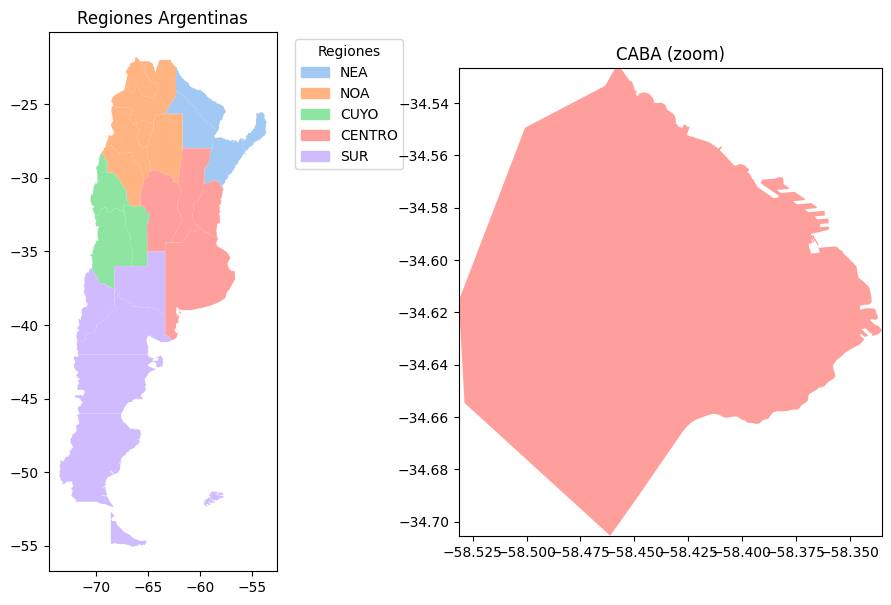

In [142]:
# Agrupar provincias en 5 regiones diferentes
REG = {}
REG['NEA'] = [s.upper() for s in ['Formosa', 'Chaco', 'Misiones', 'Corrientes']]
REG['NOA'] = [s.upper() for s in ['Jujuy', 'Salta', 'Catamarca', 'La Rioja', 'Tucuman', 'Santiago del Estero']]
REG['CUYO'] = [s.upper() for s in ['San Juan', 'Mendoza', 'San Luis']]
REG['CENTRO'] = [s.upper() for s in ['Buenos Aires', 'CABA','Cordoba', 'Santa Fe', 'Entre Rios']]
REG['SUR'] = [s.upper() for s in ['La Pampa','Neuquen', 'Rio Negro', 'Chubut', 'Santa Cruz', 'Tierra del Fuego']]

# Plot PROVINCES (sin islas/antártida) con colores por región
colors = dict(zip(REG.keys(), sns.color_palette("pastel", n_colors=len(REG))))
handles = [Patch(color=colors[region], label=region) for region in REG.keys()]

fig, axs = plt.subplots(1, 2, figsize=(12, 7))
for region, provincias in REG.items():
    provincias_gdf = gdf[gdf['Prov'].isin(provincias)]
    provincias_gdf.plot(ax=axs[0], color=colors[region])
axs[0].set_title('Regiones Argentinas')
axs[0].legend(handles=handles, title='Regiones', bbox_to_anchor=(1.05, 1), loc='upper left')

caba_bounds = gdf[gdf['Prov'] == 'CABA'].bounds
gdf[gdf['Prov'] == 'CABA'].plot(ax=axs[1], color= colors['CENTRO'])
axs[1].set_xlim(caba_bounds['minx'].values[0], caba_bounds['maxx'].values[0])
axs[1].set_ylim(caba_bounds['miny'].values[0], caba_bounds['maxy'].values[0])
axs[1].set_title('CABA (zoom)')

plt.show()

#### ESTACIONES METEORÓGICAS (SMN)

In [143]:
# Cargamos los datos correspondientes a las estaciones meteorológicas
# df_stations = pd.read_excel('/content/drive/My Drive/DIPLO_AG_FINAL/MeteoStationsGEO.xlsx', engine= 'openpyxl')
df_stations = pd.read_excel('/Data/MeteoStationsGEO.xlsx', engine= 'openpyxl')

# Inspeccionamos los datos
# df_stations.head()

In [144]:
# Eliminamos la primer fila y hacemos un reset del índice
df_stations.drop(df_stations.index[0], inplace=True)
df_stations.reset_index(drop=True, inplace=True)

# Convertimos a entero los datos en la columna que especifica el código único de la estación
df_stations['NRO'] = df_stations['NRO'].astype(int)

In [145]:
# Agrupamos las estaciones por provincia, y lyego generamos un listado del código de todas las estaciones en dicha prov.
df_prov = df_stations.groupby('PROVINCIA')['NRO'].apply(list).reset_index()

# # Inspeccionamos los datos
# df_prov.head()

In [146]:
# Reemplazamos el valor CABA
df_prov.replace({'PROVINCIA': {'CAPITAL FEDERAL': 'CABA'}}, inplace=True)

#### DATOS METEOROLÓGICOS DE CADA ESTACIÓN (SMN)

In [147]:
# Cargamos los datos de temp, humedad y precipitaciones diarios desde el 2018 al 2024 leídos en cada estación
# df = pd.read_csv("/content/drive/My Drive/DIPLO_AG_FINAL/MeteoDataSMN.txt")
df = pd.read_csv("/Data/MeteoDataSMN.txt")

# Inspeccionamos los datos
df.head()

,Estacion,Fecha,Temp. Maxima (°C),Temp. Minima (°C),Precipitacion (mm),Hum. Relativa Media (%)
0,87007,2018-01-01,23,7.8,0,79
1,87007,2018-01-02,20.6,7.5,3,60
2,87007,2018-01-03,18,5.4,0.7,69
3,87007,2018-01-04,22.2,5,0,66
4,87007,2018-01-05,23.4,7.6,0.1,55


In [148]:
# Renombramos las columnas
df.rename(columns={'Temp. Maxima (°C)': 'Tmax',
                   'Temp. Minima (°C)': 'Tmin',
                   'Precipitacion (mm)':'Prec',
                   'Hum. Relativa Media (%)':'HR'}, inplace=True)

# Re-definimos el tipo de dato a numérico para las 4 mediciones
df[['Tmax', 'Tmin', 'Prec', 'HR']] = df[['Tmax', 'Tmin', 'Prec', 'HR']].apply(pd.to_numeric, errors='coerce').astype('float64')

# Eliminamos filas duplicadas (si las hay)
df.drop_duplicates(inplace=True)

# Cambiamos el tipo de dato de la fecha
df['Fecha']= pd.to_datetime(df['Fecha'])

In [149]:
# # Encontramos la fecha mínima y máxima de las mediciones
# fecha_min = df['Fecha'].min()
# fecha_max = df['Fecha'].max()

# Definimos la fecha límite para tener datos hasta el 31/12/2023
fecha_limite = pd.to_datetime('2024-01-01')
df_2024 = df[df['Fecha'] >= fecha_limite]
df = df[df['Fecha'] < fecha_limite]

In [150]:
# Contamos Nans en cada columna
# nan_counts  = (df.applymap(lambda x: x == r'\N')).sum()
nan_counts = df.isna().sum()

#### DATOS METEOROLÓGICOS POR PROVINCIA

En algunas provincias tenemos más de una estación meteorológica. Pero como los datos de dengue los tenemos por provincia, lo que vamos a hacer es una media en los valores diarios medidos por las estaciones pertenecientes a cada provincia.

In [151]:
# Definimos una función para calcular la media ignorando los NaN
def media_sin_nans(lista):
    lista_filtrada = [x for x in lista if not np.isnan(x)]  # Filtrar los NaN de la lista
    return np.mean(lista_filtrada) if lista_filtrada else np.nan  # Calcular la media

In [152]:
# Diccionario con key=PROV. Dataframe con fechas unicas y la media de las mediciones de todas las estaciones en la prov.
dfu = {}
for idx, codig in enumerate(df_prov['NRO']):
    key = df_prov.loc[idx, 'PROVINCIA']
    med_prov = df[df['Estacion'].isin(codig)]                  #Tomamos las filas pertenecientes a estaciones de la prov.
    mp_agg = med_prov.groupby('Fecha').agg(lambda x: list(x))  #Agrupamos las mediciones por día.
    for mm in ['Tmax', 'Tmin', 'Prec', 'HR']:
        mp_agg[mm] = mp_agg[mm].apply(media_sin_nans)          #Calculamos la media para cada medición (Tmax/Tmin/HR/Prec.)
    dfi = mp_agg[['Tmax', 'Tmin', 'Prec', 'HR']].copy()        #Creamos el dataframe
    dfi['Fecha'] = mp_agg.index
    dfi.reset_index(drop=True, inplace=True)
    dfu[key]= dfi                                              #Asignamos el dataframe al dicc con key=provincia

In [153]:
# Si no hay datos de ninguna estación de la provincia, rellenamos con las mediciones realizadas el día previo
for k in dfu.keys():
    if any(dfu[k].isna().sum()):
        # print('Filled', dfu[k].isna().sum().sum(),' nans in ', k)
        dfu[k] = dfu[k].fillna(method='ffill')

In [154]:
# Como los datos de dengue están por semana epidemiológica, asignaremos qué semana epi correponde a cada fecha
dfu_all = pd.DataFrame()
for key in dfu.keys():
    dfu[key]['Year'] = dfu[k]['Fecha'].dt.year
    dfu[key]['EpiWeek'] = dfu[k]['Fecha'].apply(lambda x: int(x.strftime("%V")))
    dfu[key]['Prov'] = key
    dfu[key]['Reg'] =  next(reg for reg, values in REG.items() if key in values)
    #Agrupar por semana, año y provincia
    df_weekly = dfu[key].groupby(['Year', 'EpiWeek', 'Prov']).agg({
        'Reg' : 'first',
        'Tmax': 'max',
        'Tmin': 'min',
        'Prec': 'sum',
        'HR': 'mean'
    }).reset_index()
    #Crear un único dataframe
    dfu_all = pd.concat([dfu_all,df_weekly] , axis=0)

dfu_all = dfu_all.reset_index()
dfu_all = dfu_all.drop(columns=['index'])

In [155]:
#Analizar dataframe completo
dfu_all.head(10)

,Year,EpiWeek,Prov,Reg,Tmax,Tmin,Prec,HR
0,2018,1,BUENOS AIRES,CENTRO,32.632000,9.996000,18.429000,50.175870
1,2018,2,BUENOS AIRES,CENTRO,35.416667,14.208333,32.483333,60.291925
2,2018,3,BUENOS AIRES,CENTRO,33.760870,11.504167,3.815399,61.973344
3,2018,4,BUENOS AIRES,CENTRO,31.983333,10.166667,13.416667,62.121518
4,2018,5,BUENOS AIRES,CENTRO,33.572000,14.300000,6.480833,58.997961
5,2018,6,BUENOS AIRES,CENTRO,35.972000,10.100000,13.231333,56.489694
6,2018,7,BUENOS AIRES,CENTRO,35.400000,6.852000,21.525000,54.970166
7,2018,8,BUENOS AIRES,CENTRO,29.908000,11.192000,2.152000,66.075238
8,2018,9,BUENOS AIRES,CENTRO,33.412000,14.556000,7.404500,65.252857
9,2018,10,BUENOS AIRES,CENTRO,32.364000,8.228000,9.020833,57.394493


In [156]:
# Acumulación  de precipitaciones anuales por provincia
prec_anual = dfu_all.groupby(['Year','Prov'])['Prec'].sum().round(2)

In [157]:
# Acumulación de precipitaciones anuales por region
prec_anual_reg = dfu_all.groupby(['Year','Reg'])['Prec'].sum().round(2)

In [158]:
# Función para graficar precipitaciones regionales en el mapa
def update_plot_preci_reg(year):
    fig, ax = plt.subplots(figsize=(15, 12))
    gdf.plot(ax=ax)

    # Iterar sobre las provincias y pintarlas con un color basado en la cantidad de casos de dengue
    for region, provincias in REG.items():
        reg_geom = gdf[gdf['Prov'].isin(provincias)].geometry.values
        color = plt.cm.viridis(prec_anual_reg[year, region] / max(prec_anual_reg[year]))
        gpd.GeoSeries(reg_geom).plot(ax=ax, color=color)

    # Crear una barra de colores (colorbar) para representar el mapa de calor
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=min(prec_anual_reg[year]), vmax=max(prec_anual_reg[year])))
    cbar = fig.colorbar(sm)

    # Añadir título y leyenda
    ax.set_title('Precipitacion anual por región (año {})'.format(year))
    cbar.set_label('Precipitaciones anuales [mm]')

# Crear un deslizador para seleccionar el año
years = dfu_all['Year'].unique()

year_slider = widgets.IntSlider(
    value=years[-1],
    min=years.min(),
    max=years.max(),
    step=1,
    description='Year:',
    continuous_update=False
)

# # Gráfica en el mapa
# interact(update_plot_preci_reg, year=year_slider)

In [159]:
# Funcion para calcular precipitacion acumulada por semana y gráfica de barras
def plot_precipitacion_mensual(year, provincia):
    df_p = dfu[provincia].copy()
    df_p['Month'] = df_p['Fecha'].dt.month
    df_p_grouped = df_p.groupby(['Year', 'Month'])['Prec'].sum().reset_index()
    df_plot = df_p_grouped[df_p_grouped['Year'] == year]
    # Define los nombres de los meses
    meses_name = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    df_plot['Mes'] = [meses_name[m-1] for m in df_plot['Month']]

    fig = go.Figure()
    fig.add_trace(go.Bar(x=df_plot['Mes'], y=df_plot['Prec'],
                         marker_color='rgb(96, 65, 56)', marker_opacity=0.7, name=f'Precipitaciones {year}'))


    fig.update_layout(title=f'Precipitacion mensual en {provincia} para el año {year}',
                      title_x=0.5,
                      xaxis_title='Mes del año',
                      yaxis_title='Precipitaciones por mes [mm]',
                      template='plotly_white',
                      width=900,
                      height=450)
    fig.show()

In [264]:
# Crear widgets interactivos para seleccionar el año y la provincia
years = list(range(2018, 2024))
provincias = list(dfu.keys())
year_widget = widgets.Dropdown(options=years, value=2018, description='Año:')
provincia_widget = widgets.Dropdown(options=provincias, value='SALTA', description='Provincia:')

# Conectar widgets con la función plot_precipitacion_mensual
interact(plot_precipitacion_mensual, year=year_widget, provincia=provincia_widget)

interactive(children=(Dropdown(description='Año:', options=(2018, 2019, 2020, 2021, 2022, 2023), value=2018), …

<function __main__.plot_precipitacion_mensual(year, provincia)>

In [161]:
# Función para graficar la evolución de Tmax y Tmin durante un año en una provincia
def plot_temperatura_anual(year, provincia):
    df_gr = dfu[provincia][dfu[provincia]['Year'] == year]
    df_gr['Fecha_int'] = (df_gr['Fecha'] - df_gr['Fecha'].min()).dt.days

    fig = go.Figure()

    # Aplicar un filtro de media móvil para suavizar la señal
    window_size = 20
    x_new = df_gr['Fecha_int']
    y_tmax_smooth = np.convolve( df_gr['Tmax'], np.ones(window_size)/window_size, mode='valid')
    y_tmin_smooth = np.convolve( df_gr['Tmin'], np.ones(window_size)/window_size, mode='valid')
    y_tmean = (y_tmax_smooth + y_tmin_smooth ) / 2


    fig.add_trace(go.Scatter(x=x_new, y=y_tmax_smooth, mode='lines', name='Max Temp', line=dict(color='rgb(255, 0, 0)')))
    fig.add_trace(go.Scatter(x=x_new, y=y_tmin_smooth, mode='lines', name='Min Temp', line=dict(color='rgb(0, 0, 255)')))
    fig.add_trace(go.Scatter(x=x_new, y=y_tmax_smooth, mode='lines', name= 'Filled',  fill='tonexty', fillcolor='rgba(255, 0.1, 0.2, 0.3)', line=dict(color='rgba(255, 0, 0, 0)')))

    fig.add_trace(go.Scatter(x=x_new, y=y_tmean, mode='lines', name='Mean Temp', line=dict(color='white',dash='dash')))

    fig.update_layout(title=f'Evolución de Tmax/Tmin en {provincia} durante el año {year}',
                      title_x=0.5,
                      xaxis_title='Días del año',
                      yaxis_title='Temperatura (°C)',
                      template='plotly_white',
                      width=900,
                      height=450)

    fig.show()

In [162]:
# Crear widgets interactivos para seleccionar el año y la provincia
warnings.filterwarnings("ignore")

years = list(range(2018, 2024))
provincias = list(dfu.keys())
year_widget = widgets.Dropdown(options=years, value=2022, description='Año:')
provincia_widget = widgets.Dropdown(options=provincias, value='CABA', description='Provincia:')

# Conectar widgets con la función plot_temperatura_anual
interact(plot_temperatura_anual, year=year_widget, provincia=provincia_widget)

interactive(children=(Dropdown(description='Año:', index=4, options=(2018, 2019, 2020, 2021, 2022, 2023), valu…

<function __main__.plot_temperatura_anual(year, provincia)>

In [163]:
# Función para graficar la evolución de humedad durante un año en una provincia
def plot_humedad_anual(year, provincia):
    df_gr = dfu[provincia][dfu[provincia]['Year'] == year]
    df_gr['Fecha_int'] = (df_gr['Fecha'] - df_gr['Fecha'].min()).dt.days

    fig = go.Figure()

    x_new = np.linspace(df_gr['Fecha_int'].min(), df_gr['Fecha_int'].max(), 200)
    f_h = interp1d(df_gr['Fecha_int'], df_gr['HR'], kind='cubic')
    y_h_smooth = f_h(x_new)

    fig.add_trace(go.Scatter(x=x_new, y=y_h_smooth, mode='lines', name='Humedad Relativa', line=dict(color='rgb(100, 35, 95)', dash='dash'), opacity=0.7))

    # Aplicar un filtro de media móvil para suavizar la señal
    window_size = 20
    y_smooth = np.convolve( df_gr['HR'], np.ones(window_size)/window_size, mode='valid')
    fig.add_trace(go.Scatter(x=df_gr['Fecha_int'], y=y_smooth, mode='lines', name='Smooth HR', line=dict(color='rgb(200, 95, 95)', width=2)))


    fig.update_layout(title=f'Evolución de la Humedad Relativa en {provincia} durante el año {year}',
                      title_x=0.5,
                      xaxis_title='Días del año',
                      yaxis_title='Humedad Relativa',
                      template='plotly_white',
                      width=900,
                      height=450)

    fig.show()

In [164]:
# Crear widgets interactivos para seleccionar el año y la provincia
warnings.filterwarnings("ignore")

years = list(range(2018, 2024))
provincias = list(dfu.keys())
year_widget = widgets.Dropdown(options=years, value=2023, description='Año:')
provincia_widget = widgets.Dropdown(options=provincias, value='CORDOBA', description='Provincia:')

# Conectar widgets con la función plot_humedad_anual
interact(plot_humedad_anual, year=year_widget, provincia=provincia_widget)

interactive(children=(Dropdown(description='Año:', index=5, options=(2018, 2019, 2020, 2021, 2022, 2023), valu…

<function __main__.plot_humedad_anual(year, provincia)>

### DATOS DE DENGUE

#### LECTURA CASOS DENGUE Y ANÁLISIS DE DATOS

In [165]:
# Cargamos los datos de dengue de cada año (no están normalizados)
File_names= ['2018.csv', '2019.xlsx','2020.xlsx','2021.xlsx','2022.xlsx','2023.xlsx']

In [166]:
# Creamos un diccionario con key=AÑO, donde generamos un dataframe para cada año
df_dengue = {}
for i,file in enumerate(File_names):
    fdes = re.match(r'(\d+)(\..+)', file)
    key = fdes.group(1)
    ext = fdes.group(2)
    if ext == '.xlsx':
        # df_dengue[key] = pd.read_excel('/content/drive/My Drive/DIPLO_AG_FINAL/' + file, engine= 'openpyxl')
        df_dengue[key] = pd.read_excel('/Data/' + file, engine= 'openpyxl')
    else:
        # df_dengue[key] = pd.read_csv('/content/drive/My Drive/DIPLO_AG_FINAL/' + file, encoding='utf-8')
        df_dengue[key] = pd.read_csv('/Data/' + file, encoding='utf-8')

In [167]:
# Listado con el nombre de las columnas que queremos guardar
columnsNew = ['Year', 'EpiWeek', 'Prov', 'Age_group','Dengue_cases']

In [168]:
# Encontramos los nombres de las columnas correspondientes a los datos que queremos guardar (en cada excel tienen dif. nombres)
year_col = []
sepi_col = []
prov_col = []
age_col = []
cases_col = []
for key in df_dengue.keys():
    nameCol1 = df_dengue[key].columns.values[df_dengue[key].columns.str.contains('|'.join(['evento']), case=False)][0]
    df_dengue[key]= df_dengue[key][df_dengue[key][nameCol1].str.contains('Dengue', case=False, na=False)]
    # Find columns containing the data I want to save
    nameCol = df_dengue[key].columns.values[df_dengue[key].columns.str.contains('|'.join(['año', 'ano', 'anio']), case=False)][0]
    year_col.append(nameCol)
    nameCol = df_dengue[key].columns.values[df_dengue[key].columns.str.contains('|'.join(['epi']), case=False)][0]
    sepi_col.append(nameCol)
    nameCol = df_dengue[key].columns.values[df_dengue[key].columns.str.contains('|'.join(['provincia_nombre','provincia_res']), case=False)][0]
    prov_col.append(nameCol)
    nameCol = [columna for columna in df_dengue[key].columns if columna in ['grupo_edad_desc','GRUPO_ETARIO']]
#     nameCol = df_dengue[key].columns.values[df_dengue[key].columns.str.contains('|'.join(['grupo_edad_desc','GRUPO_ETARIO']), case=True)][0]
    age_col.append(nameCol[0])
    nameCol = df_dengue[key].columns.values[df_dengue[key].columns.str.contains('|'.join(['casos','total']), case=False)][0]
    cases_col.append(nameCol)


In [169]:
# Generamos un dataframe que contenga todos los años, ordenados por año y semana epidemiológica
df_dengue_new = pd.DataFrame(columns=columnsNew)
for i, key in enumerate(df_dengue.keys()):
    dfi = df_dengue[key][[year_col[i], sepi_col[i], prov_col[i], age_col[i],cases_col[i]]]
    dfi.columns = columnsNew
    dfi_sorted = dfi.sort_values(by='EpiWeek')
    df_dengue_new = pd.concat([df_dengue_new, dfi_sorted], ignore_index=True)

In [170]:
# Cambiamos los datos de grupo etario: sólo miníusculas
df_dengue_new['Age_group'] = df_dengue_new['Age_group'].str.lower()

# # Identificamos los grupos etarios definidos
# df_dengue_new['Age_group'].unique()

In [171]:
# Creamos una función para convertir la edad a un string de rangos definidos
def convertir_a_rango_1(valor):
    age_range = ['0-4', '5-9', '10-14', '15-24', '25-34', '35-44', '45-65', '65-100']
    # Encontrar números en el string
    numeros = re.findall(r'\d+', str(valor))
    # Encontrar palabras clave
    palabras_clave = re.findall(r'neonato|posneonato|meses', str(valor), flags=re.IGNORECASE)
    if palabras_clave:
        return '0-4años'
    else:
        if numeros:
            if len(numeros) == 1:
                try:
                    numero = int(numeros[0])
                    if numero == 65:
                        return '65+años'
                    elif numero == 1:
                        return '0-4años'
                except ValueError:
                    print('Error: ', valor)
                    pass
            else:
                rango_str = '-'.join(numeros)
                if rango_str not in age_range:
                    for rango1 in age_range:
                        rango_min, rango_max = map(int, rango1.split('-'))
                        valor_min, valor_max = map(int, rango_str.split('-'))
                        if valor_min >= rango_min and valor_max<=rango_max:
                            return rango1 + 'años'
                else:
                    return rango_str + 'años'
        else:
            return 'No data'

In [172]:
# Aplicamos la función a la columna de grupo etario de nuestro dataframe
df_dengue_new['Age_group'] = df_dengue_new['Age_group'].map(convertir_a_rango_1)

# Inspeccionamos los valores únicos de esta columna
df_dengue_new['Age_group'].unique()

array(['15-24años', '25-34años', '45-65años', '65+años', '5-9años',
       '10-14años', '35-44años', '0-4años', 'No data'], dtype=object)

In [173]:
# Buscamos NaN values en el dataframe
df_dengue_new.isna().sum()

# Eliminamos registros que no contengan la provincia donde ocurrió el contagio
df_dengue_new = df_dengue_new.dropna()

In [174]:
# Cambiamos los valores de las provincias por mayúsculas, sin tildes (para coincidir con datos del SMN y del IGN)
df_dengue_new['Prov'] = df_dengue_new['Prov'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

In [175]:
# Eliminamos registros que no contengan un valor válido en provincia
mask = ~df_dengue_new['Prov'].isin(df_prov['PROVINCIA'])
df_dengue_new = df_dengue_new[~mask]
# df_dengue_new['Prov'].nunique() #Check we have 24 provinces

In [176]:
# Agregamos la región al dataframe
region_mapping = {prov: region for region, provinces in REG.items() for prov in provinces}
df_dengue_new['Reg'] = df_dengue_new['Prov'].map(region_mapping)

In [177]:
columnsOrder = ['Year', 'EpiWeek', 'Prov', 'Reg', 'Age_group','Dengue_cases']
df_dengue_new = df_dengue_new.reindex(columns=columnsOrder)

In [178]:
df_dengue_new.reset_index(drop=True, inplace=True)

In [179]:
df_dengue_new.head(10)

,Year,EpiWeek,Prov,Reg,Age_group,Dengue_cases
0,2018,1,FORMOSA,NEA,15-24años,3
1,2018,2,MISIONES,NEA,25-34años,1
2,2018,2,CHACO,NEA,25-34años,1
3,2018,3,FORMOSA,NEA,45-65años,1
4,2018,4,CHACO,NEA,25-34años,1
5,2018,5,SANTIAGO DEL ESTERO,NOA,65+años,1
6,2018,5,SANTIAGO DEL ESTERO,NOA,25-34años,1
7,2018,5,SANTIAGO DEL ESTERO,NOA,15-24años,1
8,2018,5,CABA,CENTRO,15-24años,1
9,2018,6,CABA,CENTRO,5-9años,1


##### ANALISIS DE CASOS POR AÑO Y GRUPO ETARIO

In [180]:
# Contamos el número total de casos desde el 2018 al 2023
Total_cases_all = df_dengue_new['Dengue_cases'].sum()
print('El total de casos acumulados en Arg. (2018-2023) es: ', Total_cases_all)

El total de casos acumulados en Arg. (2018-2023) es:  195496


In [181]:
# Analizamos el nº de casos por cada año y hacemos gráfico de  barras
df_dengue_new['Dengue_cases'] = pd.to_numeric(df_dengue_new['Dengue_cases'], errors='coerce')
Total_cases_per_year = df_dengue_new.groupby('Year')['Dengue_cases'].sum()

#Graficar
fig = px.bar(Total_cases_per_year, title='Total Dengue Cases per Year')

fig.update_layout(plot_bgcolor='white',
                  xaxis_title='Year',
                  yaxis_title='Dengue Cases',
                  title_x=0.5,  # Centrar el título horizontalmente
                  showlegend=False,
                  margin=dict(t=50, l=100, r=6, b=50),
                  width=600,
                  height=400)

fig.show(renderer='colab')

Podemos observar brotes epidémicos tanto en 2020 como en 2023.

In [182]:
# Analizamos el nº de casos por cada año en cada provincia
Total_prov_cases_per_year = df_dengue_new.groupby(['Year','Prov'])['Dengue_cases'].sum()

# Analizamos el nº de casos por cada año en cada región
Total_reg_cases_per_year = df_dengue_new.groupby(['Year','Reg'])['Dengue_cases'].sum()

In [183]:
# Analizamos el nº de casos por grupo etario en cada año
Total_age_cases_per_year = df_dengue_new.groupby(['Year','Age_group'])['Dengue_cases'].sum()

# Definimos el orden de los grupos etarios
age_range1 = ['0-4años', '5-9años', '10-14años', '15-24años', '25-34años', '35-44años', '45-65años', '65+años', 'No Data']

In [184]:
# Creamos el dataframe
perc_by_age = {}

for i, year in enumerate(df_dengue_new['Year'].unique()):
    cases_by_age = Total_age_cases_per_year.loc[year]
    cases_by_age_sorted = cases_by_age.reindex(age_range1, fill_value=0)
    perc_by_age[year] = cases_by_age_sorted / Total_cases_per_year[year]*100

cases_age = pd.DataFrame(perc_by_age)

In [185]:
# Crear un gráfico de barras horizontales interactivo con Plotly Express
colores_pastel = ['#FFB6C1', '#FFD700', '#90EE90', '#87CEEB', '#FFA07A', '#ADA7E8']
fig_bar = px.bar(cases_age, orientation='v', barmode='group', color_discrete_sequence=colores_pastel)
fig_bar.update_layout(title='Incidencia por rango etario y año',
                      title_x=0.5,
                      yaxis_title='Porcentaje de casos [%]',
                      xaxis_title='Rango etario',
                      plot_bgcolor='white',  # Establecer el color de fondo del gráfico como transparente
                      showlegend=True,
                      width=1100,
                      height=500)
fig_bar.show()

En cuanto a la afectación por grupo de edad se observa que, si bien afecta de forma homogénea a personas entre 15 y 65 años, se destaca el registro de casos en todos los grupos de edad incluyendo a niñas/os y adolescentes.

##### INCORPORAMOS VARIABLES DEMOGRÁFICAS

In [186]:
# Cargamos los datos demográficos por provincia (habitantes, densidad pob)
# df_demo = pd.read_excel("/content/drive/My Drive/DIPLO_AG_FINAL/Arg_dens_pob.xlsx", engine= 'openpyxl')
df_demo = pd.read_excel("/Data/Arg_dens_pob.xlsx", engine= 'openpyxl')

# Renombramos las columnas
df_demo.rename(columns={'PROVINCIA [name]': 'Prov',
                        'POBLACION 2020 [hab]': 'Pob',
                        'SUPERFICIE [km2]':'Area',
                        'DENSIDAD POB [hab/km2]':'Dens_pob'}, inplace=True)

# Normalizamos los nombres de las provincias sin minusculas ni tildes
df_demo['Prov'] = df_demo['Prov'].str.upper().apply(unidecode.unidecode)

# Modificamos tipo de dato por numérico
df_demo[['Pob']] = df_demo[['Pob']].apply(pd.to_numeric, errors='coerce').astype('int')
df_demo[['Area','Dens_pob']] = df_demo[['Area','Dens_pob']].apply(pd.to_numeric, errors='coerce').astype('float64')

# Creamos una serie para la población por provincia
pob_prov = df_demo.set_index('Prov')['Pob']

In [187]:
# Calculamos la tasa de incidencia cada 100mil habitantes en el país y por provincias, para cada año
inc_by_prov_sorted = {}
for i, year in enumerate(df_dengue_new['Year'].unique()):
    cases_by_prov = Total_prov_cases_per_year[year].reindex(pob_prov.index, fill_value=0)
    inc_by_prov = cases_by_prov  / pob_prov * 100000
    inc_by_prov_sorted[year] = inc_by_prov.sort_values(ascending=True)

In [188]:
# Calculamos la población en cada región
pob_reg = pd.Series(index=REG.keys(), data=[pob_prov[pob_prov.index.isin(provinces)].sum() for provinces in REG.values()])

# Calculamos la tasa de incidencia cada 100mil habitantes por región
inc_by_reg_sorted = {}
for i, year in enumerate(df_dengue_new['Year'].unique()):
    cases_by_reg = Total_reg_cases_per_year[year].reindex(pob_reg.index, fill_value=0)
    inc_by_reg = cases_by_reg  / pob_reg * 100000
    inc_by_reg_sorted[year] = inc_by_reg.sort_values(ascending=True)

In [189]:
# Función para graficar la evolución de humedad durante un año en una provincia
colores_pastel = ['#FFB6C1', '#FFD700', '#90EE90', '#87CEEB', '#FFA07A', '#ADA7E8']
colors1 = dict(zip(REG.keys(), colores_pastel))

def obtener_region(reg_dic, provincia):
    for region, provincias in reg_dic.items():
        if provincia in provincias:
            return region
    return None

def plot_incidencia(year):
    fig = go.Figure()

    for provincia in inc_by_prov_sorted[year].index:
        region = obtener_region(REG, provincia)
        fig.add_trace(go.Bar(
            x=[inc_by_prov_sorted[year][provincia]],
            y=[provincia],
            orientation='h',
            name=region,
            marker_color=colors1[region]
        ))

    fig.update_layout(title=f'Tasa de incidencia en el año {year}',
                      title_x=0.5,
                      xaxis_title='Incidencia cada 100 mil hab.',
                      yaxis_title='Provincia',
                      template='plotly_white',
                      barmode='group',
                      showlegend=False,
                      width=900,
                      height=600)

    fig.show()

In [265]:
# Crear widgets interactivos para seleccionar el año
warnings.filterwarnings("ignore")

years = list(range(2018, 2024))
year_widget = widgets.Dropdown(options=years, value=2021, description='Año:')

# Conectar widgets con la función plot_humedad_anual
interact(plot_incidencia, year=year_widget)

interactive(children=(Dropdown(description='Año:', index=3, options=(2018, 2019, 2020, 2021, 2022, 2023), valu…

<function __main__.plot_incidencia(year)>

In [191]:
# Crear un DataFrame con los datos de cada año y provincia
colors = sns.color_palette("pastel")
province_colors = {province: colors[i % len(colors)] for i, province in enumerate(df_dengue_new['Prov'].unique())}
province_colors['OTHERS'] = '#FF5733'

data = []
serie_incid = pd.Series(inc_by_prov_sorted)
years = df_dengue_new['Year'].unique()
for year in years:
    cases_by_province = serie_incid.loc[year]
#     cases_by_province = Total_prov_cases_per_year.loc[year]
    contribution_percentages = cases_by_province / cases_by_province.sum() * 100
    other_provinces_mask = contribution_percentages < 2
    others_cases = cases_by_province[other_provinces_mask].sum()
    cases_by_province1 = cases_by_province[~other_provinces_mask]
    cases_by_province1['OTHERS'] = others_cases
    data.append(cases_by_province1.sort_values(ascending=False))

# Crear gráficos de torta interactivos con Plotly Express
fig = px.sunburst(
    names=data[0].index,
    parents=["" for _ in data[0].index],
    values=data[0].values,
    color=data[0].index,  # Colores basados en los nombres de las provincias
    color_discrete_map={province: province_colors[province] for province in data[0].index},
    title=  f'{years[0]} - Tasa de incidencia cada 100 mil hab.'
)

fig.update_layout(
    plot_bgcolor='white',  # Color de fondo del gráfico
    title_x=0.5,
    margin=dict(t=50, l=10, r=10, b=10),
    uniformtext=dict(minsize=12, mode='hide'),
    width=700,
    height=450
)

# Añadir botones para cambiar el año
steps = []
for i, year in enumerate(years):
    step = dict(
        method="update",
        args=[{"values": [data[i].values],
               "labels": [data[i].index]},
               {"title": f'{year} - Tasa de incidencia cada 100 mil hab.' }],
        label=f'{year}'
    )
    steps.append(step)

sliders = [dict(
    active=0,
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()


In [266]:
# Crear un DataFrame con los datos de cada año y región
colors = sns.color_palette("pastel")
reg_colors = {reg: colors[i % len(colors)] for i, reg in enumerate(df_dengue_new['Reg'].unique())}

data = []
serie_incid_r = pd.Series(inc_by_reg_sorted)
years = df_dengue_new['Year'].unique()
for year in years:
    cases_by_region = serie_incid_r.loc[year]
#     cases_by_region = Total_reg_cases_per_year.loc[year]
    data.append(cases_by_region)

# Crear gráficos de torta interactivos con Plotly Express
fig = px.sunburst(
    names=data[0].index,
    parents=["" for _ in data[0].index],
    values=data[0].values,
    color=data[0].index,  # Colores basados en los nombres de las provincias
    color_discrete_map={reg: reg_colors[reg] for reg in data[0].index},
    title=  f'{years[0]}  - Tasa de incidencia cada 100 mil hab.'
)

fig.update_layout(
    plot_bgcolor='white',  # Color de fondo del gráfico
    title_x=0.5,
    margin=dict(t=50, l=10, r=10, b=10),
    uniformtext=dict(minsize=12, mode='hide'),
    width=700,
    height=450
)

# Añadir botones para cambiar el año
steps = []
for i, year in enumerate(years):
    step = dict(
        method="update",
        args=[{"values": [data[i].values],
               "labels": [data[i].index]},
               {"title": f'{year} - Tasa de incidencia cada 100 mil hab.' }],
        label=f'{year}'
    )
    steps.append(step)

sliders = [dict(
    active=0,
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

interactive(children=(IntSlider(value=2023, description='Year:', max=2023, min=2018), Output()), _dom_classes=…

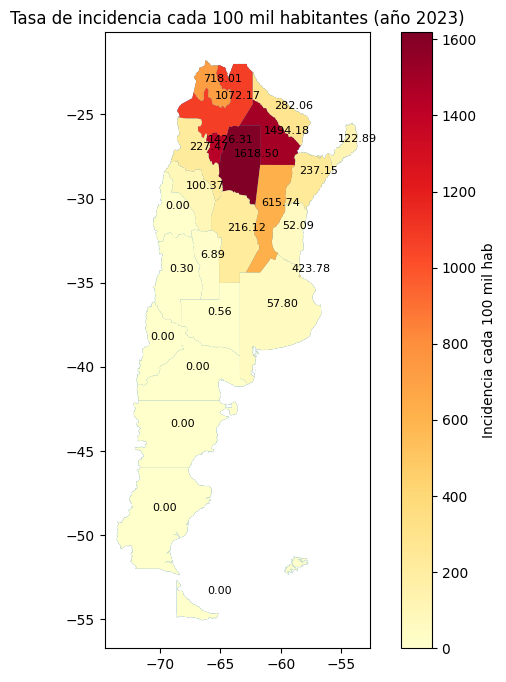

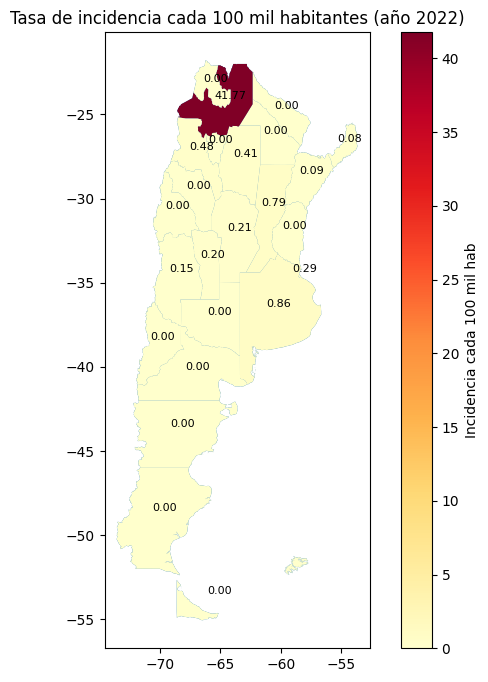

In [193]:
# Función para graficar el mapa con colores según numero de casos en las provincias segun el año seleccionado
def update_dengue_plot(year):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.clear()
    gdf.plot(ax=ax)
    cases_by_province = serie_incid.loc[year]
#     cases_by_province = Total_prov_cases_per_year.loc[year]
    cases_by_province1 = {province: cases_by_province.get(province, 0) for province in df_dengue_new['Prov'].unique()}

    max_cases = max(cases_by_province1.values())

    # Iterar sobre las provincias y pintarlas con un color basado en la cantidad de casos de dengue
    for province, cases in cases_by_province1.items():
        province_geom = gdf[gdf['Prov'] == province].geometry.values
        color = plt.cm.YlOrRd(cases / max_cases)
        gpd.GeoSeries(province_geom).plot(ax=ax, color=color)

        # Agregar número en la provincia que indique la tasa de incidencia
        province_centroid = gdf[gdf['Prov'] == province].centroid.values[0]
        ax.annotate(f'{cases:.2f}', (province_centroid.x-1, province_centroid.y),
                    xytext=(3, 3), textcoords="offset points", color='black', fontsize=8)

    # Crear una barra de colores (colorbar) para representar el mapa de calor
    sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=plt.Normalize(vmin=0, vmax=max_cases))
    cbar = fig.colorbar(sm)

    # Añadir título y leyenda
    ax.set_title('Tasa de incidencia cada 100 mil habitantes (año {})'.format(year))
    cbar.set_label('Incidencia cada 100 mil hab')

years = df_dengue_new['Year'].unique()

# Crear un widget de deslizador para seleccionar el año
year_slider = widgets.IntSlider(
    value=years[-1],
    min=years.min(),
    max=years.max(),
    step=1,
    description='Year:'
)

# Grafica interactiva de casos por provincia
interact(update_dengue_plot, year=year_slider);

##### ANÁLISIS POR SEMANA EPIDEMIOLÓGICA

In [194]:
sepi_cases = df_dengue_new.groupby(['Year','EpiWeek'])['Dengue_cases'].sum()

In [195]:
def weeks_in_year(year):
    last_day = datetime.date(year, 12, 31)
    _, last_week, _ = last_day.isocalendar()
    # Check if the last week is part of the current year or next year
    if last_week == 1:
        # If the last week of the previous year is part of the current year
        _, last_week, _ = (last_day - datetime.timedelta(days=7)).isocalendar()

    return last_week

In [267]:
# Grafica de casos por semana epidemiologica
year_list = []
index_list = []
value_list = []

## Crear una lista de todas las semanas posibles (1 a 53)
# all_weeks = list(range(1, 54))

fig = go.Figure()

for year in df_dengue_new['Year'].unique():
    all_weeks = list(range(1, weeks_in_year(year)+1))
    sepi = sepi_cases.loc[year]
#     sepi_filled = sepi.reindex(sepi_cases[year].index, fill_value=0) # consider all weeks (fill with zero)
    sepi_filled = sepi.reindex(all_weeks, fill_value=0)
    x_new = np.linspace(min(sepi_filled.index), max(sepi_filled.index), 300)
    f1 = interp1d(sepi_filled.index, sepi_filled.values, kind='cubic')
    y1_smooth = f1(x_new)
    fig.add_trace(go.Scatter(x=x_new, y=y1_smooth, mode='lines', name=str(year), line=dict(width=3)))
    # Append data to lists
    year_list.extend([year] * len(sepi_filled))  # Repeat the year for each index
    index_list.extend(sepi_filled.index)         # Collect the index values
    value_list.extend(sepi_filled.values)        # Collect the corresponding values


fig.update_layout(title='Casos de Dengue por Semana Epidemiológica',
#                   xaxis=dict(tickvals=list(range(1, 53, 5))),
                  xaxis=dict(
                        rangeslider=dict(
                            visible=True,
                            thickness=0.05  # Ajustar el grosor del control deslizante
                        ),
                        type='linear'  # Utilizar tipo lineal para el eje x
                    ),
                  xaxis_title='Semana Epidemiológica',
                  yaxis_title='Nº de Casos',
                  height=600,
                  width=700,
                  legend_title='Año',
                  legend=dict(orientation='v', xanchor='right', x=1),
                  template='plotly_white')

fig.show()

Podemos observar que los patrones temporales son similares cada año. Sin embargo, cuando vemos el número total de casos, se destacan el brote epidémico de 2020 y el brote en 2023.

In [197]:
# Crear el dataframe para la SERIE TEMPORAL completa
data_ts = {
    'Year': year_list,
    'EpiWeek': index_list,
    'Dengue_cases': value_list
}
df_ts = pd.DataFrame(data_ts) #Dataframe for temporal series


# Ploteamos la serie temporal total
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ts.index, y=df_ts['Dengue_cases'], mode='lines', line=dict(width=3)))
fig.update_layout(title='Casos de Dengue en Argentina (2018-2023)',
                  title_x = 0.5,
                  xaxis=dict(
                        rangeslider=dict(
                            visible=True,
                            thickness=0.05  # Ajustar el grosor del control deslizante
                        ),
                        type='linear'  # Utilizar tipo lineal para el eje x
                    ),
                  height=600,
                  width=1000,
                  yaxis_title='Nº de Casos',
                  xaxis_title = 'Semana epidemiológica acumulada',
                  template='plotly_white')

fig.show()

#### JOIN DATA (DENGUE + METEOROLOGY) FOR TEMPORAL SERIES

In [198]:
# Ordenar por provincia, año y semana epidemiológica
df_sorted = df_dengue_new.sort_values(by=['Prov', 'Year', 'EpiWeek']).reset_index(drop=True)

# Agrupar por año, semana epidemiológica y provincia y combinar Dengue_cases y Age_group
dengue_grouped = df_sorted.groupby(['Year', 'EpiWeek', 'Prov']).agg({'Dengue_cases': list, 'Age_group': list}).reset_index()
dengue_grouped['TOTAL_CASES'] = dengue_grouped['Dengue_cases'].apply(sum)
dengue_grouped = dengue_grouped.sort_values(by=['Prov', 'Year', 'EpiWeek']).reset_index(drop=True)

# Fusionar con el DataFrame de mediciones meteorológicas
df_merged = pd.merge(dfu_all, dengue_grouped, on=['Year', 'EpiWeek', 'Prov'], how='left')

# Corregir valores que han quedado como Nans
df_merged[['Dengue_cases','TOTAL_CASES']] = df_merged[['Dengue_cases','TOTAL_CASES']].fillna(0)
df_merged['TOTAL_CASES'] = df_merged['TOTAL_CASES'].astype(int)
df_merged['Age_group'] = df_merged['Age_group'].fillna(value='None')

In [199]:
#Agregar una columna para analizar por region
def asignar_region(provincia):
    for region, provincias in REG.items():
        if provincia in provincias:
            return region
    return None

df_merged['Region'] = df_merged['Prov'].apply(asignar_region)

In [200]:
# Lista con el nuevo orden de las columnas
new_order = ['Year', 'EpiWeek', 'Prov', 'Region', 'Tmax', 'Tmin', 'Prec', 'HR', 'Dengue_cases', 'Age_group', 'TOTAL_CASES']
df_merged = df_merged.reindex(columns=new_order)
df_merged.head(8)

,Year,EpiWeek,Prov,Region,Tmax,Tmin,Prec,HR,Dengue_cases,Age_group,TOTAL_CASES
0,2018,1,BUENOS AIRES,CENTRO,32.632000,9.996000,18.429000,50.175870,0,None,0
1,2018,2,BUENOS AIRES,CENTRO,35.416667,14.208333,32.483333,60.291925,0,None,0
2,2018,3,BUENOS AIRES,CENTRO,33.760870,11.504167,3.815399,61.973344,0,None,0
3,2018,4,BUENOS AIRES,CENTRO,31.983333,10.166667,13.416667,62.121518,0,None,0
4,2018,5,BUENOS AIRES,CENTRO,33.572000,14.300000,6.480833,58.997961,0,None,0
5,2018,6,BUENOS AIRES,CENTRO,35.972000,10.100000,13.231333,56.489694,0,None,0
6,2018,7,BUENOS AIRES,CENTRO,35.400000,6.852000,21.525000,54.970166,"[1, 1]","[45-65años, 15-24años]",2
7,2018,8,BUENOS AIRES,CENTRO,29.908000,11.192000,2.152000,66.075238,[1],[25-34años],1


Ahora tengo un dataframe con una serie temporal para cada provincia. Tengo que hacer el análisis por provincia

In [201]:
# Función para calcular la matrix de correlación por provincia
def plot_corr_total_cases(province):
    df_corr = df_merged[(df_merged['Prov'] == province)]

    # correlation_matrix = df_corr[['EpiWeek','Tmin', 'Tmax', 'HR', 'Prec', 'TOTAL_CASES']].corr(method='spearman')
    # results = pg.pairwise_corr(df_corr[['EpiWeek','Tmin', 'Tmax', 'HR', 'Prec', 'TOTAL_CASES']], method='spearman')
    correlation_matrix = df_corr[['Tmin', 'Tmax', 'HR', 'Prec', 'TOTAL_CASES']].corr(method='spearman')
    results = pg.pairwise_corr(df_corr[['Tmin', 'Tmax', 'HR', 'Prec', 'TOTAL_CASES']], method='spearman')

    # Imprimir la correlación y los p-values
    res_matrix = results[results['Y']=='TOTAL_CASES'][['X','r','p-unc']]
    res_matrix.set_index('X', inplace=True)
    res_matrix[['r', 'p-unc']] = res_matrix[['r', 'p-unc']].applymap(lambda x: round(x, 3))
    print(res_matrix)

    # Visualizar la matriz de correlación como un mapa de calor
    plt.figure(figsize=(14, 1))
    sns.heatmap(correlation_matrix[['TOTAL_CASES']].drop(['TOTAL_CASES']).T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlación entre Variables Meteorológicas y Casos de Dengue en {province}')
    plt.show()

# Obtener lista única de provincias
provinces = df_merged['Prov'].unique().tolist()
province_dropdown = widgets.Dropdown(options=provinces, description='Provincia:')

widgets.interact(plot_corr_total_cases, province=province_dropdown)

interactive(children=(Dropdown(description='Provincia:', options=('BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO'…

<function __main__.plot_corr_total_cases(province)>

In [202]:
# Función para calcular la matrix de correlación por provincia
def plot_corr_total_cases1(region):
    df_corr = df_merged[(df_merged['Region'] == region)]

    correlation_matrix = df_corr[['EpiWeek','Tmin', 'Tmax', 'HR', 'Prec', 'TOTAL_CASES']].corr(method='spearman')
    results = pg.pairwise_corr(df_corr[['EpiWeek','Tmin', 'Tmax', 'HR', 'Prec', 'TOTAL_CASES']], method='spearman')

    # Imprimir la correlación y los p-values
    res_matrix = results[results['Y']=='TOTAL_CASES'][['X','r','p-unc']]
    res_matrix.set_index('X', inplace=True)
    res_matrix[['r', 'p-unc']] = res_matrix[['r', 'p-unc']].applymap(lambda x: round(x, 3))
    print(res_matrix)

    # Visualizar la matriz de correlación como un mapa de calor
    plt.figure(figsize=(14, 1))
    sns.heatmap(correlation_matrix[['TOTAL_CASES']].drop(['TOTAL_CASES']).T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlación entre Variables Meteorológicas y Casos de Dengue en la region {region}')
    plt.show()


# Obtener lista única de provincias
regions = df_merged['Region'].unique().tolist()
reg_dropdown = widgets.Dropdown(options=regions, description='Región:')

# widgets.interact(plot_corr_total_cases1, region=reg_dropdown)

#### JOIN DATA FOR OTHER ALGORITHMS (NO TEMPORAL SERIES)

In [203]:
df_merged_2 = df_merged.drop(columns=['Dengue_cases','Age_group'])

In [204]:
df_merged_2['Tmean'] = df_merged_2[['Tmin', 'Tmax']].mean(axis=1)

In [205]:
# Cambiar tipos de datos
df_merged_2[['TOTAL_CASES','EpiWeek','Year']] = df_merged_2[['TOTAL_CASES','EpiWeek','Year']].astype(int)

# Crear una nueva columna 'Region_code' asignando códigos numéricos a 'Prov'
cat_reg =['SUR', 'CUYO', 'CENTRO','NEA', 'NOA']
df_merged_2['Region_code'] = pd.Categorical(df_merged_2['Region'], categories=cat_reg, ordered=True).codes
# df_merged_2['Region_code'] = df_merged_2['Region'].astype('category').cat.codes
code_to_reg = dict(zip(df_merged_2['Region_code'], df_merged_2['Region']))
df_merged_2 = df_merged_2.drop(columns=['Region'])

In [206]:
# Ordenamos las columnas
new_order = ['Year', 'EpiWeek', 'Prov', 'Region_code', 'Tmean', 'Tmax', 'Tmin', 'Prec', 'HR', 'TOTAL_CASES']
df_merged_2 = df_merged_2.reindex(columns=new_order)

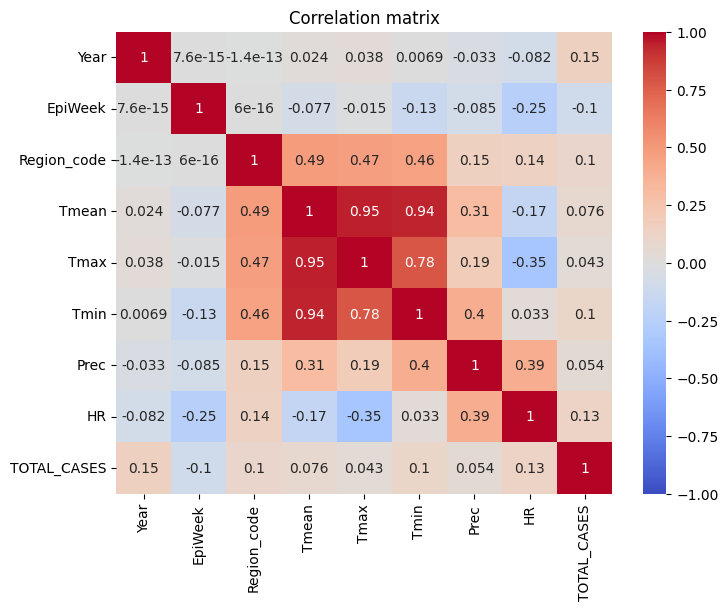

In [207]:
#Crear matriz de correlación
corr_matrix_2 = df_merged_2.drop(columns='Prov').corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

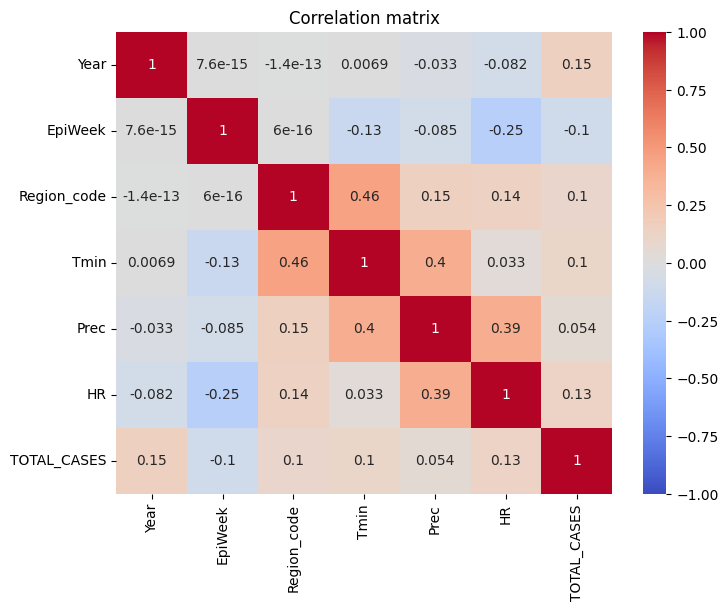

In [208]:
# Eliminamos Tmean, y Tmin
# df_merged_2 = df_merged_2.drop(columns=['Tmin', 'Tmax'])
df_merged_2 = df_merged_2.drop(columns=['Tmean', 'Tmax'])

#Crear matriz de correlación
corr_matrix_2 = df_merged_2.drop(columns='Prov').corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

AGREGAREMOS DATOS METEOROLOGICOS DE UNA Y DOS SEMANAS ANTERIORES

In [209]:
# Mediciones meteorológicas de una y dos semanas anteriores a los casos detectados (Tendré 2 * 24 = 48 filas menos)
grouped = df_merged_2.groupby('Prov')
shifted = grouped[['Tmin', 'Prec', 'HR']].shift(1)
shifted2 = grouped[['Tmin', 'Prec', 'HR']].shift(2)

# Concatenar el DataFrame original con las mediciones desplazadas
df_extended = pd.concat([df_merged_2, shifted.add_suffix('_1w'), shifted2.add_suffix('_2w')], axis=1)
df_extended = df_extended.dropna(subset=['Tmin_1w', 'Prec_1w', 'HR_1w', 'Tmin_2w', 'Prec_2w', 'HR_2w'])
df_extended = df_extended.sort_values(by=['Prov', 'Year', 'EpiWeek']).reset_index(drop=True)

In [210]:
# Ordenamos las columnas
new_order = ['Year', 'EpiWeek', 'Prov', 'Region_code', 'Tmin', 'Prec', 'HR','Tmin_1w', 'Prec_1w', 'HR_1w','Tmin_2w', 'Prec_2w', 'HR_2w', 'TOTAL_CASES']
df_extended = df_extended.reindex(columns=new_order)
df_extended.tail()

,Year,EpiWeek,Prov,Region_code,Tmin,Prec,HR,Tmin_1w,Prec_1w,HR_1w,Tmin_2w,Prec_2w,HR_2w,TOTAL_CASES
7483,2023,48,TUCUMAN,4,15.2,53.3,79.571429,17.0,29.0,70.857143,17.0,0.1,61.000000,2
7484,2023,49,TUCUMAN,4,12.6,7.2,79.142857,15.2,53.3,79.571429,17.0,29.0,70.857143,0
7485,2023,50,TUCUMAN,4,17.5,11.0,73.000000,12.6,7.2,79.142857,15.2,53.3,79.571429,1
7486,2023,51,TUCUMAN,4,16.2,55.9,87.000000,17.5,11.0,73.000000,12.6,7.2,79.142857,1
7487,2023,52,TUCUMAN,4,19.1,97.0,75.125000,16.2,55.9,87.000000,17.5,11.0,73.000000,5


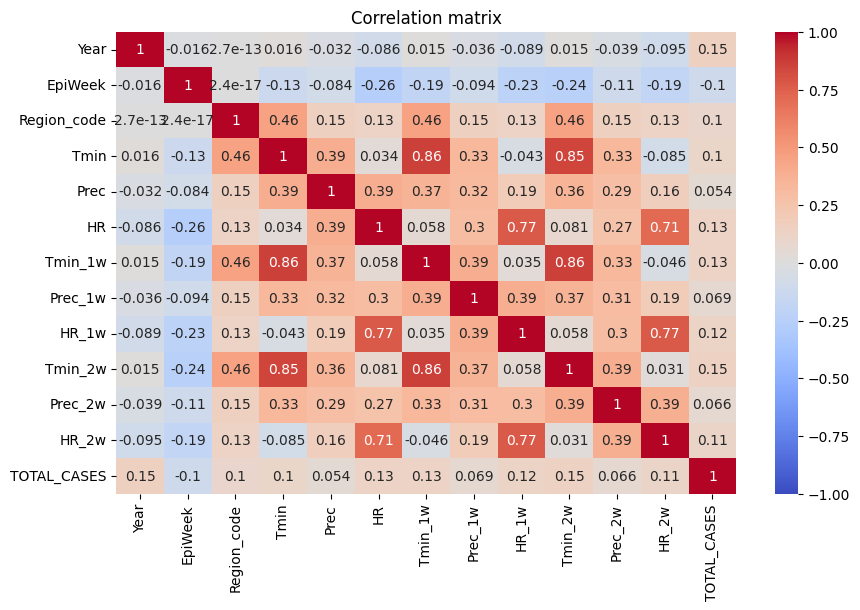

In [211]:
# Crear matriz de correlación
corr_matrix_ext2 = df_extended.drop(columns='Prov').corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_ext2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

ANALIZAMOS CORRELACIONES DE FORMA ESPECÍFICA POR PROVINCIA/AÑO

In [212]:
# Función para calcular la matrix de correlación para una provincia y año particular
def plot_correlation_heatmap(province, year):
    df_filtered = df_extended[(df_extended['Prov'] == province) & (df_extended['Year'] == year)]
    if df_filtered.empty:
        print("No hay casos para la provincia y año seleccionado.")
    else:
        corr_matrix = df_filtered.drop(columns=['Year','Prov','Region_code']).corr(method='spearman')
        plt.figure(figsize=(14, 1))
        sns.heatmap(corr_matrix[['TOTAL_CASES']].drop(['TOTAL_CASES']).T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title(f'Correlación entre Variables Meteorológicas y Casos de Dengue en {province} en el año {year}')
        plt.show()

In [213]:
# Obtener lista única de provincias y años
provinces = df_extended['Prov'].unique().tolist()
years = df_extended['Year'].unique().tolist()

# Crear widgets para el menú desplegable
province_dropdown = widgets.Dropdown(options=provinces, description='Provincia:')
year_dropdown = widgets.Dropdown(options=years, description='Año:')

# Asociar la función con los widgets
widgets.interact(plot_correlation_heatmap, province=province_dropdown, year=year_dropdown)

interactive(children=(Dropdown(description='Provincia:', options=('BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO'…

<function __main__.plot_correlation_heatmap(province, year)>

## MODELOS MACHINE LEARNING NIVEL NACIONAL

SERIES TEMPORALES SIN VAR. METEOROLÓGICAS

ANALISIS DESCRIPTIVO Y EXPLORATORIO DE LA SERIE

In [214]:
# Crear una Serie Temporal con fechas como índice
df_ts['Date'] = pd.date_range(start='2018-01-01', end='2023-12-31', freq='W')
time_series = pd.Series(df_ts['Dengue_cases'].values, index=df_ts['Date'])

In [215]:
# Variables descriptivas básicas
time_series.describe()

count      313.000000
mean       624.587859
std       2144.223519
min          0.000000
25%          1.000000
50%         11.000000
75%        162.000000
max      17211.000000
dtype: float64

- SD: Observamos gran variabilidad (dispersión de los datos)
- Media >> Mediana: Distribución sesgada (asimetría positiva)

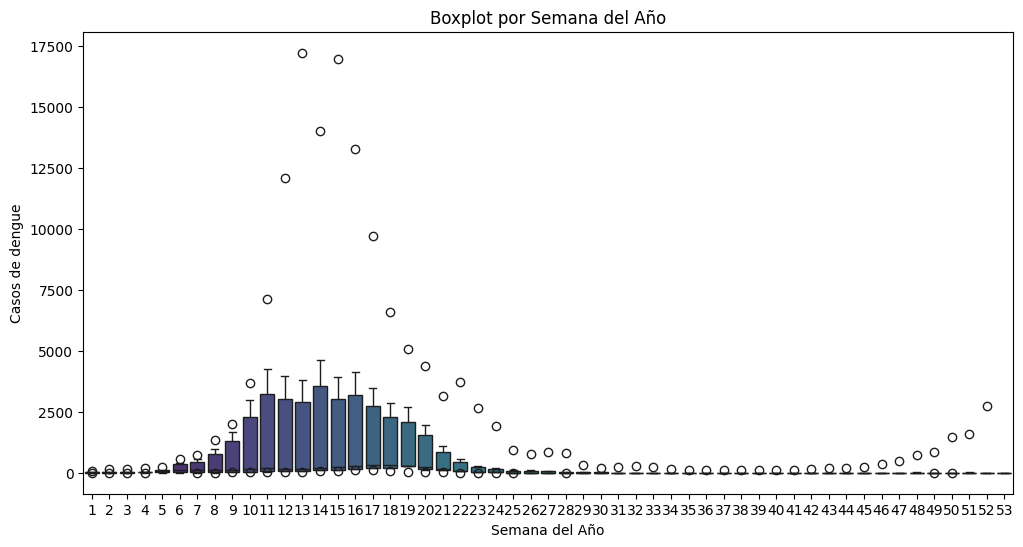

In [216]:
# Crear un boxplot por semana del año (considerando los 6 años)
plt.figure(figsize=(12, 6))
sns.boxplot(x='EpiWeek', y='Dengue_cases', data=df_ts, whis=[5, 95], palette='viridis')
plt.title('Boxplot por Semana del Año')
plt.xlabel('Semana del Año')
plt.ylabel('Casos de dengue')
plt.show()

Este gráfico parece indicar que existe una variabilidad significativa en los datos, con una gran cantidad de valores atípicos o extremos.

In [217]:
# Analizar la posibilidad de estudiar los casos en años sin brotes separados de los años con epidemia
epi_years = [2020, 2023]
nor_years = np.setdiff1d(df_ts['Year'].unique(), epi_years)
df_ts_epi = df_ts[df_ts['Year'].isin(epi_years)]
df_ts_nor = df_ts[df_ts['Year'].isin(nor_years)]

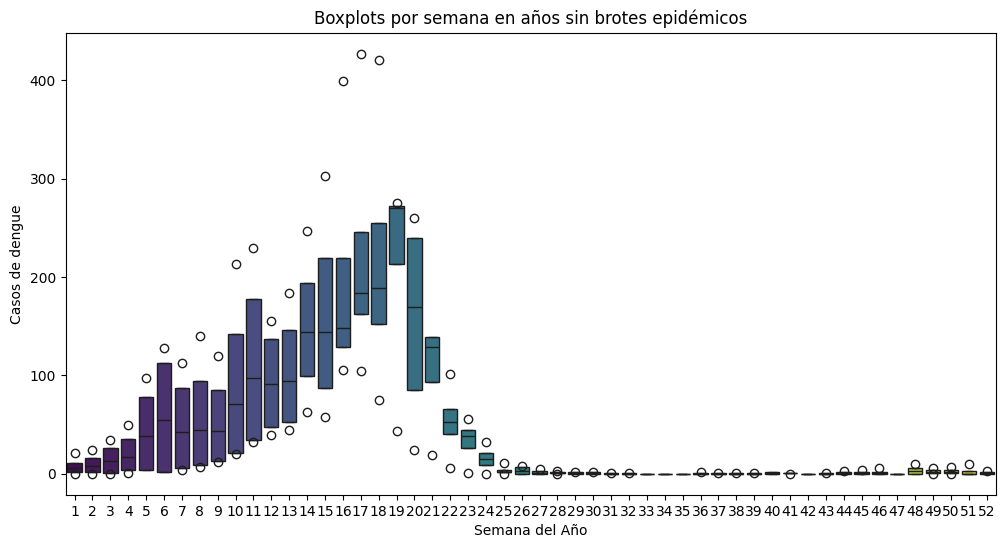

In [218]:
# Boxplots sin considerar casos en años con epidemia
cases_without_epi = df_ts_nor['Dengue_cases'].sum()

plt.figure(figsize=(12, 6))
sns.boxplot(x='EpiWeek', y='Dengue_cases', data=df_ts_nor, whis=[5, 95], palette='viridis')
plt.title('Boxplots por semana en años sin brotes epidémicos')
plt.xlabel('Semana del Año')
plt.ylabel('Casos de dengue')
plt.show()

In [219]:
# # Boxplots sin considerar casos en años con epidemia
cases_with_epi = df_ts_epi['Dengue_cases'].sum()

# plt.figure(figsize=(12, 6))
# sns.boxplot(x='EpiWeek', y='Dengue_cases', data=df_ts_epi, whis=[5, 95], palette='viridis')
# plt.title('Boxplots por semana en años con brotes epidémicos')
# plt.xlabel('Semana del Año')
# plt.ylabel('Casos de dengue')
# plt.show()

#Calcular la media de casos por semana para años con/sin brote
mean_cases_epi = df_ts_epi.groupby('EpiWeek')['Dengue_cases'].mean()
mean_cases_ne = df_ts_nor.groupby('EpiWeek')['Dengue_cases'].mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_cases_epi.index, y=mean_cases_epi.values, mode='lines', name='Años con brote', line=dict(width=3)))
fig.add_trace(go.Scatter(x=mean_cases_ne.index, y=mean_cases_ne.values, mode='lines', name='Años sin brote', line=dict(width=3)))
fig.update_layout(title='Media de casos por Semana Epidemiológica',
                  title_x=0.5,
                  xaxis=dict(
                        rangeslider=dict(
                            visible=True,
                            thickness=0.05  # Ajustar el grosor del control deslizante
                        ),
                        type='linear'  # Utilizar tipo lineal para el eje x
                    ),
                  xaxis_title='Semana Epidemiológica',
                  yaxis_title='Nº de Casos',
                  height=600,
                  width=700,
                  legend=dict(orientation='v', xanchor='right', x=1),
                  template='plotly_white')

fig.show()

In [220]:
# # Teniendo en cuenta años con/sin brotes epidémicos, analizamos desde qué semana se disparan los casos
# # Para ello calculamos (mean_cases_epi_years - std_e) y lo comparamos con (mean_cases_ne_years + std_ne)
# for i in range(1,53):
#     acum_cases = df_ts[df_ts['EpiWeek'] <= i].groupby('Year')['Dengue_cases'].agg('sum').reset_index()
#     mepi = acum_cases[acum_cases['Year'].isin(epi_years)]['Dengue_cases'].mean() - acum_cases[acum_cases['Year'].isin(epi_years)]['Dengue_cases'].std()
#     mnor = acum_cases[acum_cases['Year'].isin(nor_years)]['Dengue_cases'].mean() + acum_cases[acum_cases['Year'].isin(nor_years)]['Dengue_cases'].std()
#     if mepi >= 1.5 * mnor:
#         print('El número de casos empieza a diferir entre años sin/con brote en la semana: ', i)
#         break

In [221]:
# Calculamos la diferencia de casos media entre años con/sin brote
dif_cases_epi =  Total_cases_per_year[epi_years].mean().astype('int32') - Total_cases_per_year[nor_years].mean().astype('int32')
print('Diferencia de casos media entre año con/sin brote: ', dif_cases_epi)

Diferencia de casos media entre año con/sin brote:  90877


TRABAJAMOS EN LA SERIE ORIGINAL CON TODOS LOS DATOS

In [222]:
# Cáculo y gráfica de Media móvil
ww = 52
yMA  = time_series.rolling(window=ww).mean()

# LOESS: suavizar la serie utilizando estimación local de regresión (LOESS: Local Regression)
# loess = sm_api.nonparametric.lowess(time_series.values, time_series.index)
# smooth_cases = loess[:, 1]

# Graficamos MEDIAS MOVILES y LOESS (regresión ponderada localmente)
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Scatter(x=time_series.index, y=time_series.values, mode='lines', name='Casos', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=time_series.index, y=yMA, mode='lines', name='Medias móviles', line=dict(color='red')))
# fig.add_trace(go.Scatter(x=time_series.index, y=smooth_cases, mode='lines', name='Curva Suavizada (LOESS)', line=dict(color='green')))

fig.update_layout(
    title='Evolución de Casos y medias móviles',
    title_x = 0.5,
    height=500,
    width=800,
    xaxis_title='Fecha',
    yaxis_title='Casos',
    template='plotly_white',
    showlegend=True
)

fig.show()

Descomposición de la serie (aditiva y multiplicativa)

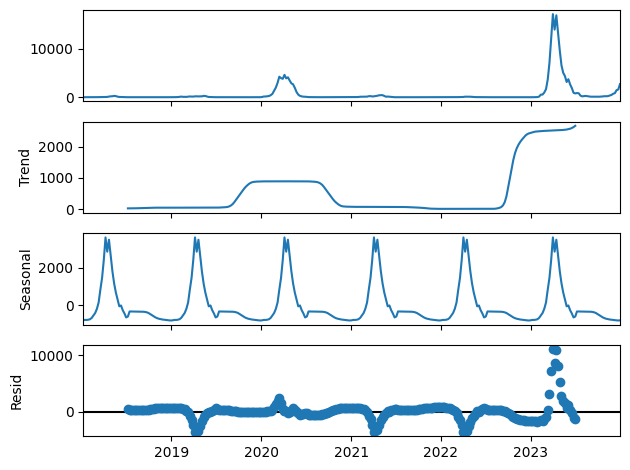

In [223]:
# Descomposición aditiva de la serie
decom_add = sm_api.tsa.seasonal_decompose(time_series, model= 'additive')
fig = decom_add.plot()
plt.show()

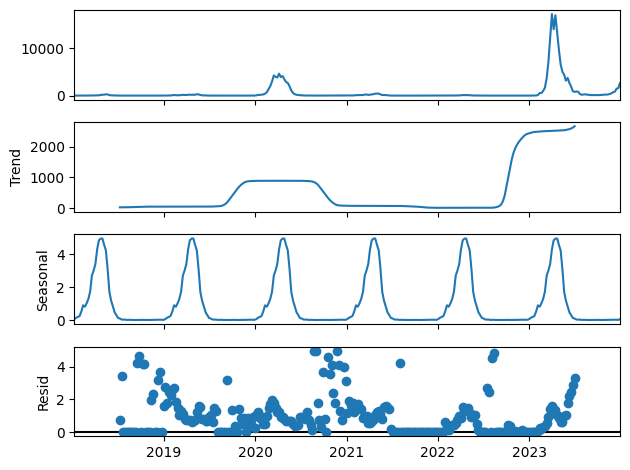

In [224]:
# Descomposición multiplicativa de la serie
epsilon = 1e-5
ad_time_series = time_series + epsilon  # Sumar una pequeña constante para evitar ceros

ad_decom_add = sm_api.tsa.seasonal_decompose(ad_time_series, model= 'multiplicative')
fig = ad_decom_add.plot()
plt.show()

- La tendencia es compleja.
- Tenemos una fuerte componente estacional.
- El residuo exhibe patrones.

ARIMA (Modelo autorregresivo integrado de media móvil): modelo estadístico que utiliza variaciones y regresiones de datos estadísticos con el fin de encontrar patrones para una predicción hacia el futuro. Es un modelo dinámico de series temporales, es decir, las estimaciones futuras vienen explicadas por los datos del pasado y no por variables independientes.

Comprobar ESTACIONARIEDAD: verificamos que la media, la varianza y la autocorrelación de la serie son constantes a lo largo del tiempo.

In [225]:
# Prueba dick-fuller para comprobar HO: la serie no es estacionaria (nos ayuda a determinar d)
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Prueba KPSS (Kwiatkowski-Phillips-Schmidt-Shin) H0: la serie es estacionaria
result = kpss(time_series)
print('KPSS Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.762032403669047
p-value: 6.424975030226242e-05
KPSS Statistic: 0.3121908286266225
p-value: 0.1


Visualización de autocorrelación

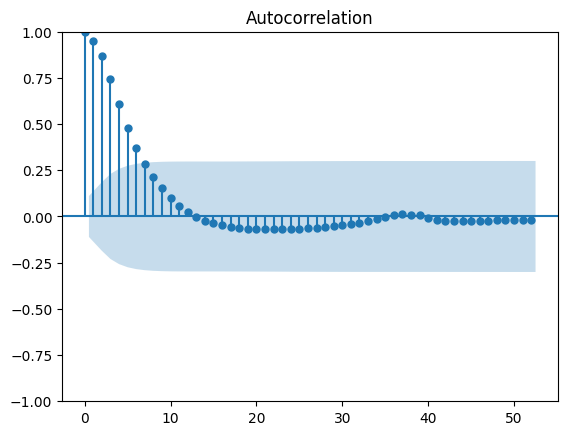

In [226]:
# Visualizar ACF para determinar p
plot_acf(time_series, lags=52)
plt.show()

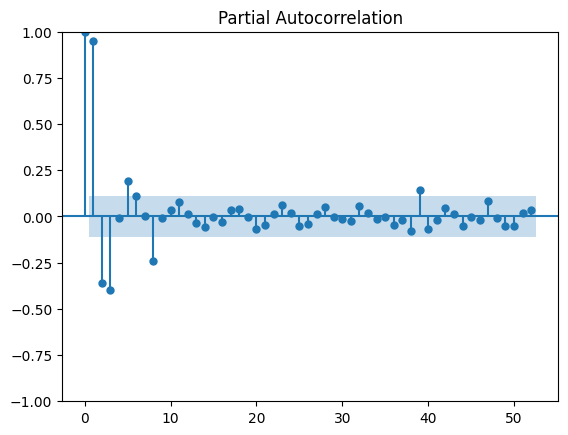

In [227]:
# Visualizar PACF para determinar q
plot_pacf(time_series, lags=52)
plt.show()

Si la ACF disminuye gradualmente después de unos pocos retrasos y la PACF es significativa en el primer retraso y luego decae, podría indicar un modelo AR (p > 0, q = 0).

#### 1.1) SARIMA (Seasonal autoregressive integrated moving average)
Para usar SARIMA tenemos que determinar los parámetros (p,d,q) y (P,D,Q,m).

In [228]:
# Split into training and testing data
test_epi = 52
train_data = time_series[:-test_epi]
test_data = time_series[-test_epi:]

# Definir fechas para predicir (contenidas en el índice de test data)
start_date = test_data.index[0].date()
end_date =  test_data.index[-1].date()
ts_forecast = pd.date_range(start=start_date, end=end_date, freq='W')

In [229]:
# Parametros del modelo
m = 52
# par1 = [(1,0,0), (2,0,0), (1,0,1), (1,1,0), (1,1,1)]
# par2 = [(1,0,0,m), (0,1,0,m), (0,0,1,m), (1,0,1,m), (1,1,0,m), (0,1,1,m), (1,1,1,m)]

par1 = [(1,1,1)]
par2 = [(0,1,1,52)]

In [230]:
# Ajustar el modelo con diferentes parámetros y elegir el mejor en términos de AICc
best_model = None
best_aicc = float('inf')

# Iterar sobre todas las combinaciones de parámetros
for p1 in par1:
    for p2 in par2:
        try:
            # Ajustar el modelo SARIMA
            model = SARIMAX(train_data, order=p1, seasonal_order=p2)
            result = model.fit(disp=False)

            # Calcular AICc del modelo
            aicc = result.aicc

            # Actualizar el mejor modelo si encontramos un MSE menor
            if aicc < best_aicc:
                best_aicc = aicc
                best_model = model
                best_result = result

        except:
            continue

In [231]:
# Resumen del modelo
print(best_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  261
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 52)   Log Likelihood               -1370.577
Date:                            Thu, 16 May 2024   AIC                           2749.153
Time:                                    17:31:32   BIC                           2762.504
Sample:                                01-07-2018   HQIC                          2754.552
                                     - 01-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7998      0.035     22.982      0.000       0.732       0.868
ma.L1         -0.4605      0.053   

- Log Likelihood: Es una medida de qué tan bien se ajusta el modelo a los datos. Cuanto más alto sea el valor, mejor será el ajuste.
- AIC: Es un criterio de selección de modelos que penaliza los modelos más complejos. Un valor AIC más bajo indica un mejor ajuste del modelo.
- BIC: Similar al AIC, pero con una penalización más fuerte para modelos más complejos.
- Ljung-Box (Q): Es una prueba de autocorrelación para los residuos del modelo. Un valor pequeño de Q indica que no hay autocorrelación significativa en los residuos.
- Prob(Q): Es el valor p asociado con la prueba de Ljung-Box. Un valor p alto sugiere que no hay autocorrelación significativa en los residuos.
- Heteroskedasticity (H): Se refiere a la prueba de heterocedasticidad para los residuos del modelo. Un valor bajo de probabilidad indica que hay heterocedasticidad en los residuos.
- Skew y Kurtosis: Estas son medidas de la asimetría y la curtosis de los residuos del modelo. Un valor de skew cercano a cero y un valor de kurtosis cercano a 3 sugieren que los residuos se distribuyen normalmente.

In [232]:
# Parameters for the optimum model
p1_opt = best_model.order #non-seasonal ARIMA order (p, d, q)
p2_opt = best_model.seasonal_order #seasonal order (P, D, Q, m)

# Hacer predicciones con el mejor modelo encontrado
forecast_best = best_result.get_forecast(steps=len(test_data))
forecast_values_best = forecast_best.predicted_mean

# Calcular MSE del modelo
mse = metrics.mean_squared_error(test_data, forecast_values_best)

# Calcular intervalos de confianza
ci = forecast_best.conf_int()  # Obtener intervalos de confianza
lower_bound = ci.iloc[:, 0]
upper_bound = ci.iloc[:, 1]

# # Graficar resultados
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data, mode='lines', name='Datos de Entrenamiento', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data, mode='lines', name='Datos de Prueba', line=dict(color='green')))
fig.add_trace(go.Scatter(x=forecast_values_best.index, y=forecast_values_best, mode='lines', name='Predicciones (Mejor Modelo)', line=dict(color='red')))

fig.add_trace(go.Scatter(x=forecast_values_best.index, y=upper_bound, mode='lines', fill='tonexty', line=dict(color='pink'), name='Intervalo de confianza 95%', showlegend=True))
# fig.add_trace(go.Scatter(x=forecast_values_best.index, y=lower_bound, mode='lines', fill='tonexty',  fillcolor='rgba(255, 192, 203, 0.5)', line=dict(color='pink'), name='Intervalo de Confianza', showlegend=True, opacity=0.3))

fig.update_layout(title='Predicciones del Mejor Modelo SARIMA',
                  title_x = 0.5,
                  xaxis_title='Fecha',
                  yaxis_title='Casos',
                  hovermode='x',  # Habilitar interacción con el mouse
                  template='plotly_white',
                  width=800,
                  height=500)
fig.show()

In [233]:
# Predicción de año con brote epidémico (compared to mean + 3 sd)
Values_for_opt = {'NAC':{'NNAR':[], 'SARIMA':[]}, 'PROV':{'NNAR':[], 'SARIMA':[]}}
for i in range(0,len(forecast_values_best)):
    acum_cases = df_ts[df_ts['EpiWeek'] <= i].groupby('Year')['Dengue_cases'].agg('sum').reset_index()
    mnor = acum_cases[acum_cases['Year'].isin(nor_years)]['Dengue_cases'].mean() + 3 * acum_cases[acum_cases['Year'].isin(nor_years)]['Dengue_cases'].std()
    cum_cases_sepi_lim = forecast_values_best[:i].sum()
    if cum_cases_sepi_lim >= mnor:
        print('Se predice un brote epidémico en la semana: ', i)
        # SARIMA_nac = test_data[:].sum() - test_data[i+8:].sum()
        Values_for_opt['NAC']['SARIMA'] = (test_data[:].sum() - test_data[i+8:].sum()) * 130 #8 semanas para ejecutar acciones y lograr inmunidad
        break
    elif i == len(forecast_values_best):
        Values_for_opt['NAC']['SARIMA'] = test_data[:].sum() * 130
        print('Se predice que no habrá brote epidémico')


Se predice un brote epidémico en la semana:  9


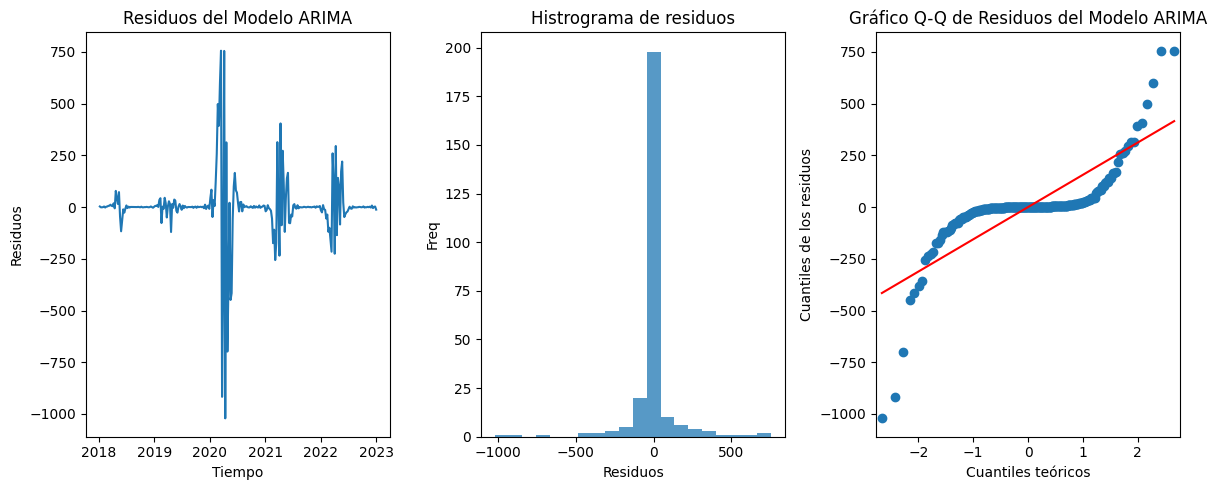

In [234]:
# Gráfico de residuos - > Observar si tenemos un patron
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Gráfico de residuos vs tiempo
axes[0].plot(best_result.resid)
axes[0].set_title('Residuos del Modelo ARIMA')
axes[0].set_xlabel('Tiempo')
axes[0].set_ylabel('Residuos')

#Histrograma
axes[1].hist(best_result.resid, bins=20, alpha=0.75)
axes[1].set_title('Histrograma de residuos')
axes[1].set_xlabel('Residuos')
axes[1].set_ylabel('Freq')


# Gráfico Q-Q de residuos
pp_res = ProbPlot(best_result.resid)
pp_res.qqplot(line='s', ax=axes[2])
axes[2].set_title('Gráfico Q-Q de Residuos del Modelo ARIMA')
axes[2].set_xlabel('Cuantiles teóricos')
axes[2].set_ylabel('Cuantiles de los residuos')

plt.tight_layout()
plt.show()

- Vemos en el gráfico QQ que los puntos se desvían significativamente de la diagonal, lo que indica que no se ajustan bien a una distribución normal.
- Los resultados no son muy buenos, y no nos permiten observar el desarrollo del brote epidémico del 2023 correctamente.
- Esto puede ser por la complejidad de los datos, que no es correctamente capturada por el modelo creado.

#### 1.2) NNAR (REDES NEURONALES AUTOREGRESIVAS)

In [235]:
# Escalar los datos
scaler = prep.MinMaxScaler(feature_range=(-1, 1))
data_normalized = scaler.fit_transform(time_series.values.reshape(-1, 1)).flatten()

In [236]:
# Crear conjuntos de datos de entrada y salida (cada 10 datos de la serie (X), guardo el siguiente en y)
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

In [237]:
# # Cada 10 datos de la serie (X), guardo el siguiente en y retardado en m semanas
# def create_sequences_shifted(data, window_size, shift):
#     X, y = [], []
#     for i in range(len(data) - window_size - shift):
#         X.append(data[i:i + window_size ])
#         y.append(data[i + window_size + shift])
#     return np.array(X), np.array(y)

In [238]:
# window_size_par = [2,10,30,40,52]
# units_par = [16,32,64]

window_size_par = [2]
units_par = [16]
# # shift = 4

best_loss = float('inf')

for window_size in window_size_par:
    for uni in units_par:
        X, y = create_sequences(data_normalized, window_size)
    #     X, y = create_sequences_shifted(data_normalized, window_size, shift)

        # Dividir en datos de entrenamiento y prueba
        split = int(0.8 * len(X))
        X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

        # Reshape para que sea compatible con la entrada de la RNN (batch_size, time_steps, input_dim)
        X_train = X_train.reshape(-1, window_size, 1)
        X_test = X_test.reshape(-1, window_size, 1)

        # Crear un modelo de red neuronal para predicción de series temporales
    #     model = Sequential([ SimpleRNN(32, activation='relu', input_shape=(window_size, 1)),
    #                          Dense(1)])
        model = Sequential()
        model.add(LSTM(units= uni, activation='relu', input_shape=(window_size, 1)))  #Long-Short term memory aprender patrones de secuencias
        model.add(Dense(units=1))  # Una única salida de predicción
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Entrenar el modelo
        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        # Evaluar el modelo
        loss = model.evaluate(X_test, y_test)

        if loss < best_loss:
            best_loss = loss
            best_model = model
            best_window = window_size
            best_X_test = X_test
            best_y_test = y_test
            best_y_train = y_train
            best_uni = uni


# Hacer predicciones con el modelo entrenado
print(f'La mejor ventana es {best_window} con units {best_uni}')

2/2 [==============================] - 0s 7ms/step - loss: 0.0794
La mejor ventana es 2 con units 16


- En el caso de una red neuronal autorregresiva, la pérdida en el conjunto de prueba indica cuán bien se desempeña el modelo al predecir los valores futuros en función de sus propias predicciones anteriores.
- Una pérdida baja en el conjunto de prueba indica que el modelo está haciendo predicciones precisas y generalizadas sobre datos que no ha visto durante el entrenamiento.

In [239]:
# Predecir los valores usando el mejor modelo
predictions = best_model.predict(best_X_test)

# # Visualizar la arquitectura de la red neuronal
# plot_model(best_model, show_shapes=True, show_layer_names=True)

# Invertir la normalización de las predicciones
best_y_train = scaler.inverse_transform([best_y_train]).flatten()
best_y_test = scaler.inverse_transform([best_y_test]).flatten()
predictions_unscaled = scaler.inverse_transform(predictions).flatten().clip(min=0)


# Visualizar
fig = go.Figure()

xtrain = np.arange(len(best_y_train))
xtest = np.arange(len(best_y_train) , len(best_y_train) + len(best_y_test))

fig.add_trace(go.Scatter(x= xtrain, y = best_y_train, mode='lines', name='Datos de Entrenamiento', line=dict(color='blue')))
fig.add_trace(go.Scatter(x= xtest, y = best_y_test, mode='lines', name='Datos de Prueba', line=dict(color='green')))
fig.add_trace(go.Scatter( x= xtest, y = predictions_unscaled, mode='lines', name='Predicciones', line=dict(color='red')))

fig.update_layout(
    title=f'Predicciones del modelo NNAR con ventana = {best_window}',
    title_x=0.5,
    yaxis_title='Casos',
    hovermode='x',  # Activar el modo hover (información detallada al pasar el mouse)
    template='plotly_white',
    width=800,
    height=500
)

fig.show()

2/2 [==============================] - 0s 6ms/step


In [240]:
# Predicción de año con brote epidémico
for i in range(0,len(predictions_unscaled)):
    acum_cases = df_ts[df_ts['EpiWeek'] <= i].groupby('Year')['Dengue_cases'].agg('sum').reset_index()
    mnor = acum_cases[acum_cases['Year'].isin(nor_years)]['Dengue_cases'].mean() + 3 * acum_cases[acum_cases['Year'].isin(nor_years)]['Dengue_cases'].std()
    cum_cases_sepi_lim = predictions_unscaled[:i].sum()
    if cum_cases_sepi_lim >=  mnor:
        print('Se predice un brote epidémico en la semana: ', i)
        # NNAR_nac = best_y_test[:].sum() - best_y_test[i+8:].sum() #Sumamos 8 semanas para ejecutar acciones (vacunación) y lograr inmunidad
        Values_for_opt['NAC']['NNAR'] = (best_y_test[:].sum() - best_y_test[i+8:].sum()) * 130 #8 semanas para ejecutar acciones y lograr inmunidad
        break
    elif i == len(predictions_unscaled)-1:
        Values_for_opt['NAC']['NNAR'] = best_y_test[:].sum() * 130
        print('Se predice que no habrá brote epidémico')

Se predice un brote epidémico en la semana:  1


Vemos que la red neuronal autorregresiva mejora en gran medida los resultados (comparada con la serie temporal SARIMA).

## MODELOS MACHINE LEARNING  NIVEL PROVINCIAL

SERIES TEMPORALES (CON/SIN VAR METEOROLÓGICAS)

#### 2.1) SARIMAX: TIME SERIES WITH EXOGENOUS DATA
En este caso deberemos trabajar por provincia de forma separada porque las variables meteorológicas son específicas a cada una de ellas.

In [241]:
# Analizaremos la provincia de Salta como ejemplo
provi = 'CORDOBA'

In [242]:
# Creamos un dataFrame para la provincia seleccionada
df_prov = df_merged[df_merged['Prov'] == provi]
df_prov.reset_index(drop=True, inplace=True)

#Creamos un array con los datos temporales
time_x = time_series.index
time_x = pd.DatetimeIndex(['2018-01-01']).append(time_x)

In [243]:
#Creamos la serie temporal para la serie y un array con var. meteorologicas
time_series_prov = pd.Series(df_prov['TOTAL_CASES'].values, index=time_x)
exog_series = pd.DataFrame(df_prov[['Tmin', 'Tmax', 'Prec', 'HR']].values, index=time_x)

test_epi = 52   #Vamos a predecir los casos para el año 2023 (52 semanas)
train_prov = time_series_prov[:-test_epi]
test_prov = time_series_prov[-test_epi:]
train_exog = exog_series[:-test_epi]
test_exog = exog_series[-test_epi:]

In [244]:
#Plot exogeneous data
plot_humedad_anual(2023, provi)
plot_temperatura_anual(2023,provi)
plot_precipitacion_mensual(2023,provi)

In [245]:
# Ajusta el modelo SARIMAX con variables exógenas
model3 = SARIMAX(endog=train_prov, exog=train_exog, order=p1_opt, seasonal_order=p2_opt)
model3_f = model3.fit()

# Realiza predicciones con el modelo ajustado
forecast3 = model3_f.get_forecast(steps=len(ts_forecast), exog=test_exog)

In [246]:
# Evalúa el rendimiento del modelo
mse3 = ((forecast3.var_pred_mean - test_prov) ** 2).mean()

# Plot
fig = go.Figure()

fig.add_trace(go.Scatter(x= train_prov.index, y=train_prov.values, mode='lines', name='Training Data', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test_prov.index, y=test_prov.values, mode='lines', name='Test Data', line=dict(color='green')))
fig.add_trace(go.Scatter(x=ts_forecast, y=forecast3.predicted_mean, mode='lines', name='Predictions', line=dict(color='red')))

fig.update_layout(
    title='Predictions from the Best SARIMAX model',
    title_x = 0.5,
    # xaxis_title='Date',
    yaxis_title='Cases',
    hovermode='x',  # Activate hover mode (detailed information on hover)
    template='plotly_white',
    width=800,
    height=500
)

fig.show()

In [247]:
# Predicción de año con brote epidémico
for i in range(0,len(forecast3.predicted_mean)):
    acum_cases = df_prov[df_prov['EpiWeek'] <= i].groupby('Year')['TOTAL_CASES'].agg('sum').reset_index()
    mnor = acum_cases[acum_cases['Year'].isin(nor_years)]['TOTAL_CASES'].mean() + 3 * acum_cases[acum_cases['Year'].isin(nor_years)]['TOTAL_CASES'].std()
    cum_cases_sepi_lim = forecast3.predicted_mean[:i].sum()
    if cum_cases_sepi_lim >=  mnor:
        print('Se predice un brote epidémico en la semana: ', i)
        # SARIMA_prov = test_prov[:].sum() - test_prov[i+8:].sum() #Sumamos 8 semanas para ejecutar acciones (vacunación) y lograr inmunidad
        Values_for_opt['PROV']['SARIMA'] = (test_prov[:].sum() - test_prov[i+8:].sum()) * 130 #8 semanas para ejecutar acciones y lograr inmunidad
        break
    elif i == len(forecast3.predicted_mean)-1:
        Values_for_opt['PROV']['SARIMA'] = test_prov[:].sum() *130
        print('Se predice que no habrá brote epidémico')

Se predice un brote epidémico en la semana:  2


Vemos que el modelo SARIMAX, aun agregando variables exógenas (Temp, HR y Precipitaciones), no da buenos resultados.

#### 2.2) NNRA WITH METEOROLOGICAL DATA (NIVEL PROVINCIAL)

In [248]:
# df_prov = df_merged[df_merged['Prov'] == provi]
# df_prov.reset_index(drop=True, inplace=True)

# time_x = time_series.index
# time_x = pd.DatetimeIndex(['2018-01-01']).append(time_x)

In [249]:
# time_series_prov = pd.Series(df_prov['TOTAL_CASES'].values, index=time_x)
# exog_series = pd.DataFrame(df_prov[['Tmin', 'Tmax', 'Prec', 'HR']].values, index=time_x)

# test_epi = 52
# train_prov = time_series_prov[:-test_epi]
# test_prov = time_series_prov[-test_epi:]
# train_exog = exog_series[:-test_epi]
# test_exog = exog_series[-test_epi:]

In [250]:
# Escalar los datos
scaler = prep.MinMaxScaler(feature_range=(0, 1))
data_prov_normalized = scaler.fit_transform(time_series_prov.values.reshape(-1, 1)).flatten()

scaler1 = prep.MinMaxScaler(feature_range=(-1, 1))
data_meteo_norm = scaler1.fit_transform(exog_series.values)

In [251]:
# Función para crear secuencias con datos exógenos
def create_sequences_with_exog(data_series, data_exog, window_size):
    X, y = [], []
    for i in range(len(data_series) - window_size):
        # Obtener la ventana de datos de la serie temporal (autoregresión)
        series_window = data_series[i:i + window_size].reshape(-1, 1)

        # Obtener los datos exógenos correspondientes a la ventana
        exog_window = data_exog[i:i + window_size]

        # Combinar la serie temporal y los datos exógenos en una única ventana
        combined_window = np.concatenate([series_window, exog_window], axis=1)

        # Guardar la ventana combinada como entrada X
        X.append(combined_window)

        # Guardar el siguiente valor como salida y
        y.append(data_series[i + window_size])

    return np.array(X), np.array(y)

In [252]:
window_size_par = [2]
units_par = [64]

best_loss = float('inf')

for window_size in window_size_par:
    for uni in units_par:
        X, y = create_sequences_with_exog(data_prov_normalized, data_meteo_norm, window_size)

        # Dividir en datos de entrenamiento y prueba
        split = int(0.8 * len(X))
        X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

        # Reshape para que sea compatible con la entrada de la RNN (batch_size, time_steps, input_dim)
        X_train = X_train.reshape(-1, window_size, 5)
        X_test = X_test.reshape(-1, window_size, 5)

        # Crear un modelo de red neuronal para predicción de series temporales
        model = Sequential()
        model.add(LSTM(units= uni, activation='relu', input_shape=(window_size, 5)))  #Long-Short term memory aprender patrones de secuencias
        model.add(Dense(units=1))  # Una única salida de predicción
        model.compile(optimizer='adam', loss='mean_squared_error')

#         print(X_train.shape, y_train.shape)

        # Entrenar el modelo
        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        # Evaluar el modelo
        loss = model.evaluate(X_test, y_test)

        if loss < best_loss:
            best_loss = loss
            best_model = model
            best_window = window_size
            best_X_test = X_test
            best_y_test = y_test
            best_y_train = y_train
            best_uni = uni


# Hacer predicciones con el modelo entrenado
print(f'La mejor ventana es {best_window} con units {best_uni}')

2/2 [==============================] - 0s 8ms/step - loss: 0.0092
La mejor ventana es 2 con units 64


In [253]:
# Predecir los valores usando el mejor modelo
predictions_prov = best_model.predict(best_X_test)

# # Visualizar la arquitectura de la red neuronal
# plot_model(best_model, show_shapes=True, show_layer_names=True)

# Invertir la normalización de las predicciones
best_y_train = scaler.inverse_transform(best_y_train.reshape(-1, 1)).flatten()
best_y_test = scaler.inverse_transform(best_y_test.reshape(-1, 1)).flatten()
predictions_prov_unscaled = scaler.inverse_transform(predictions_prov).flatten().clip(min=0)

# Visualizar
fig = go.Figure()

xtrain = np.arange(len(best_y_train))
xtest = np.arange(len(best_y_train) , len(best_y_train) + len(best_y_test))

fig.add_trace(go.Scatter(x= xtrain, y = best_y_train, mode='lines', name='Datos de Entrenamiento', line=dict(color='blue')))
fig.add_trace(go.Scatter(x= xtest, y = best_y_test, mode='lines', name='Datos de Prueba', line=dict(color='green')))
fig.add_trace(go.Scatter( x= xtest, y = predictions_prov_unscaled, mode='lines', name='Predicciones', line=dict(color='red')))

fig.update_layout(
    title=f'Predicciones NNAR para {provi} con var. meteorológicas',
    title_x=0.5,
    yaxis_title='Casos',
    hovermode='x',  # Activar el modo hover (información detallada al pasar el mouse)
    template='plotly_white',
    width=800,
    height=500
)

fig.show()

2/2 [==============================] - 0s 6ms/step


Las predicciones a nivel provincial, mejoran bastante al utilizar una NNAR.

In [254]:
# Predicción de año con brote epidémico
for i in range(0,len(predictions_prov_unscaled)):
    acum_cases = df_prov[df_prov['EpiWeek'] <= i].groupby('Year')['TOTAL_CASES'].agg('sum').reset_index()
    mnor = acum_cases[acum_cases['Year'].isin(nor_years)]['TOTAL_CASES'].mean() + 3 * acum_cases[acum_cases['Year'].isin(nor_years)]['TOTAL_CASES'].std()
    cum_cases_sepi_lim = predictions_prov_unscaled[:i].sum()
    if cum_cases_sepi_lim >=  mnor:
        print('Se predice un brote epidémico en la semana: ', i)
        # NNAR_exog_prov = best_y_test[:].sum() - best_y_test[i+8:].sum() #Sumamos 8 semanas para ejecutar acciones (vacunación) y lograr inmunidad
        Values_for_opt['PROV']['NNAR'] = (best_y_test[:].sum() - best_y_test[i+8:].sum()) * 130 #8 semanas para ejecutar acciones y lograr inmunidad
        break
    elif i == len(predictions_prov_unscaled)-1:
        Values_for_opt['PROV']['NNAR'] = best_y_test[:].sum() * 130
        print('Se predice que no habrá brote epidémico')

Se predice un brote epidémico en la semana:  1


Ahora vamos a comparar predicciones provinciales usando la NNRA sin incluir variables meteorológicas.

In [255]:
# window_size_par = [30]
# units_par = [64]

best_loss = float('inf')

for window_size in window_size_par:
    for uni in units_par:
        X, y = create_sequences(data_prov_normalized, window_size)

        # Dividir en datos de entrenamiento y prueba
        split = int(0.8 * len(X))
        X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

        # Reshape para que sea compatible con la entrada de la RNN (batch_size, time_steps, input_dim)
        X_train = X_train.reshape(-1, window_size, 1)
        X_test = X_test.reshape(-1, window_size, 1)

        # Crear un modelo de red neuronal para predicción de series temporales
        model = Sequential()
        model.add(LSTM(units= uni, activation='relu', input_shape=(window_size, 1)))  #Long-Short term memory aprender patrones de secuencias
        model.add(Dense(units=1))  # Una única salida de predicción
        model.compile(optimizer='adam', loss='mean_squared_error')

#         print(X_train.shape, y_train.shape)

        # Entrenar el modelo
        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        # Evaluar el modelo
        loss = model.evaluate(X_test, y_test)

        if loss < best_loss:
            best_loss = loss
            best_model = model
            best_window = window_size
            best_X_test = X_test
            best_y_test = y_test
            best_y_train = y_train
            best_uni = uni


# Hacer predicciones con el modelo entrenado
print(f'La mejor ventana es {best_window} con units {best_uni}')

2/2 [==============================] - 0s 8ms/step - loss: 0.0126
La mejor ventana es 2 con units 64


In [256]:
# Predecir los valores usando el mejor modelo
predictions_prov = best_model.predict(best_X_test)

# Invertir la normalización de las predicciones
best_y_train = scaler.inverse_transform(best_y_train.reshape(-1, 1)).flatten()
best_y_test = scaler.inverse_transform(best_y_test.reshape(-1, 1)).flatten()
predictions_prov_unscaled = scaler.inverse_transform(predictions_prov).flatten().clip(min=0)

# Visualizar
fig = go.Figure()

xtrain = np.arange(len(best_y_train))
xtest = np.arange(len(best_y_train) , len(best_y_train) + len(best_y_test))

fig.add_trace(go.Scatter(x= xtrain, y = best_y_train, mode='lines', name='Datos de Entrenamiento', line=dict(color='blue')))
fig.add_trace(go.Scatter(x= xtest, y = best_y_test, mode='lines', name='Datos de Prueba', line=dict(color='green')))
fig.add_trace(go.Scatter( x= xtest, y = predictions_prov_unscaled, mode='lines', name='Predicciones', line=dict(color='red')))

fig.update_layout(
    title=f'Predicciones NNAR para {provi} sin var. meteorológicas',
    title_x=0.5,
    yaxis_title='Casos',
    hovermode='x',  # Activar el modo hover (información detallada al pasar el mouse)
    template='plotly_white',
    width=800,
    height=500
)

fig.show()

2/2 [==============================] - 0s 5ms/step


Los resultados nos indican que al quitar las variables meteorológicas de nuestro modelo, las predicciones también son muy buenas. Podría estar explicado por la existencia de una correlación NO CAUSAL de la temperatura, humedad y precipitaciones con el número de casos.

#### 3) RANDOM FOREST (NO TEMPORAL SERIES)

Prepare data. Split into training and test

In [257]:
df_prov_data = df_extended[df_extended['Prov'] == provi]
df_prov_data = df_prov_data.drop(columns=['Prov','Region_code'])

agg_funcs = {
    'Tmin': 'first',  # Mantener el primer valor de Tmean
    'Prec': 'first',   # Mantener el primer valor de Prec
    'HR': 'first',     # Mantener el primer valor de HR
    'Tmin_1w': 'first',  # Mantener el primer valor de Tmean
    'Prec_1w': 'first',   # Mantener el primer valor de Prec
    'HR_1w': 'first',     # Mantener el primer valor de HR
    'Tmin_2w': 'first',  # Mantener el primer valor de Tmean
    'Prec_2w': 'first',   # Mantener el primer valor de Prec
    'HR_2w': 'first',     # Mantener el primer valor de HR
    'TOTAL_CASES': 'sum'  # Sumar los casos de dengue
}

df_prov_data = df_prov_data.groupby(['Year', 'EpiWeek']).agg(agg_funcs).reset_index()

In [258]:
df_prov_data.head()

,Year,EpiWeek,Tmin,Prec,HR,Tmin_1w,Prec_1w,HR_1w,Tmin_2w,Prec_2w,HR_2w,TOTAL_CASES
0,2018,3,13.4375,26.3625,67.857143,16.2125,36.4875,62.642857,15.3625,0.8625,58.781250,0
1,2018,4,13.8125,15.4250,69.750000,13.4375,26.3625,67.857143,16.2125,36.4875,62.642857,0
2,2018,5,15.2500,6.2875,62.071429,13.8125,15.4250,69.750000,13.4375,26.3625,67.857143,0
3,2018,6,13.7000,34.2250,66.053571,15.2500,6.2875,62.071429,13.8125,15.4250,69.750000,0
4,2018,7,8.3750,1.2500,62.732143,13.7000,34.2250,66.053571,15.2500,6.2875,62.071429,0


In [259]:
x_df = df_prov_data.drop(columns=['TOTAL_CASES'])
y_df = df_prov_data['TOTAL_CASES']

Mean Squared Error (MSE): 17945.701490476193
Coefficient of Determination (R^2): -0.7665150066361044


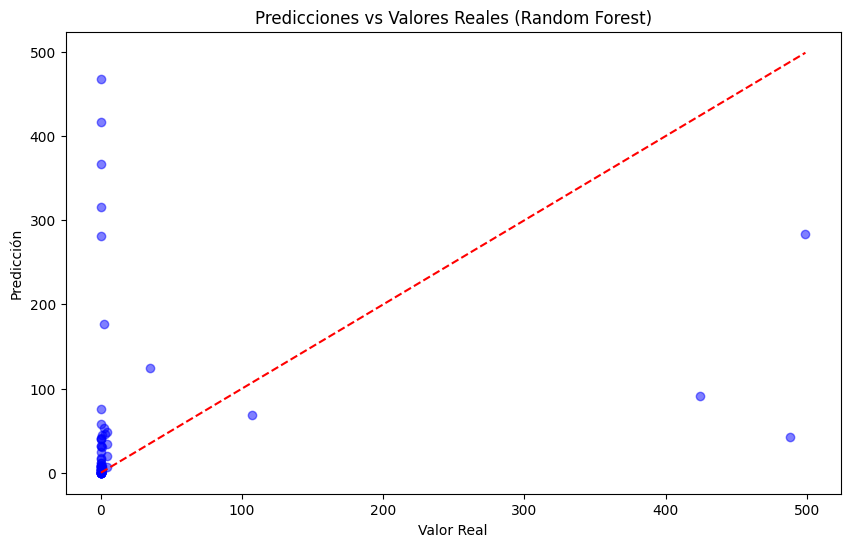

In [260]:
# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar n_estimators según lo desees
model.fit(x_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Calcular métricas de evaluación
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Coefficient of Determination (R^2): {r2}')

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales (Random Forest)')
plt.show()

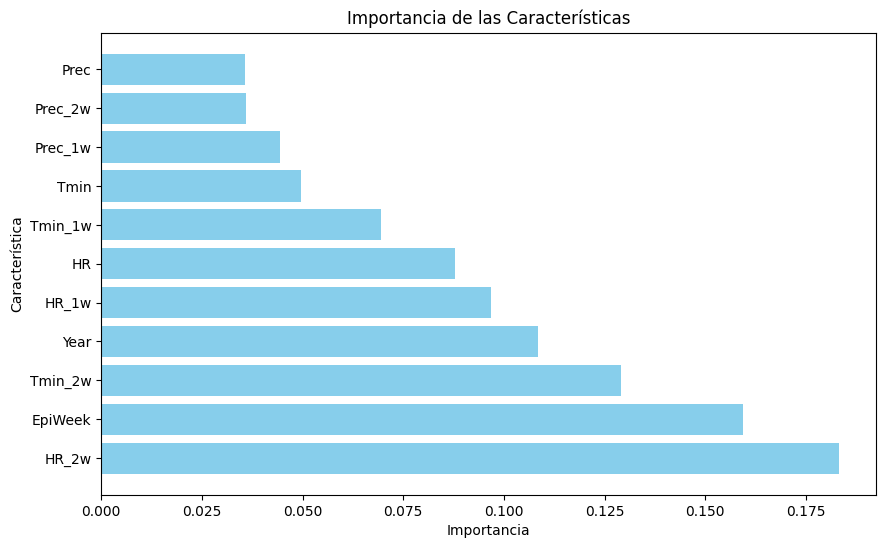

In [261]:
# Obtener la importancia de las características desde el modelo
feature_importance = model.feature_importances_

# Crear un DataFrame para mostrar la importancia de cada característica
feature_importance_df = pd.DataFrame({'Feature': x_df.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.show()

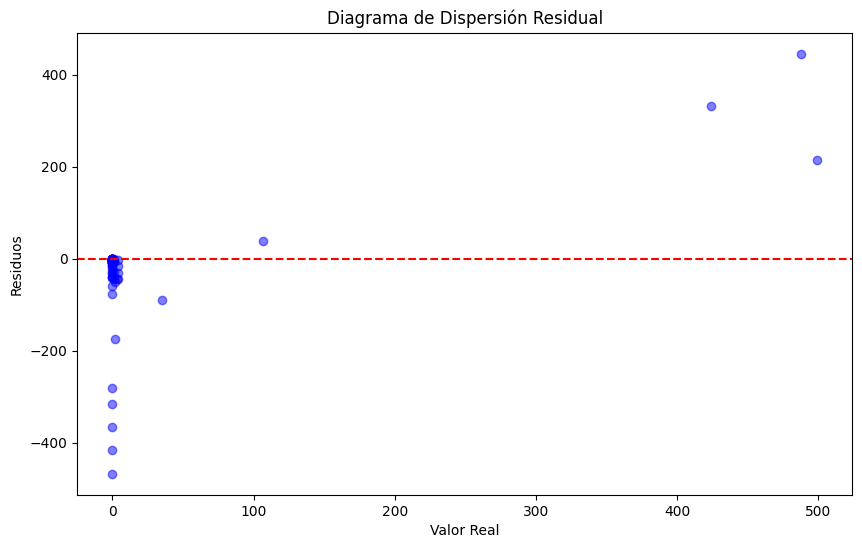

In [262]:
# Calcular los residuos
residuals = y_test - y_pred

# Graficar el diagrama de dispersión de los residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valor Real')
plt.ylabel('Residuos')
plt.title('Diagrama de Dispersión Residual')
plt.show()

Vemos que otros modelos de ML no son adecuados para tratar el problema de dengue. Esto puede ser debido a la complejidad de dicho brote epidémico, y a la importancia de la autocorrelación de los datos temporales en dicha enfermedad.

## CONCLUSIONES

#### SELECCIÓN DEL MEJOR MODELO

Tanto con series temporales con datos a nivel nacional como a nivel provincial, encontramos que las **redes neuronales autoregresivas (NNAR)** nos permiten predecir mejor el comportamiento de la serie.

En el caso del modelo construido para la provincia de CÓRDOBA, parece que **agregar las variables meteorológicas mejora las predicciones**. Igualmente, el modelo sin variables exógenas funciona correctamente, lo que puede explicarse por una correlación no causal entre éstas variables y los casos de dengue. En este caso, incluir variables exógenas que no están causalmente relacionadas con la serie temporal podría introducir ruido y hacer que el modelo de predicción sea menos efectivo.

#### IMPACTO ECONÓMICO

Por cada paciente tratado se estima que el gasto medio es de 130 usd (estimación basada en el gasto por pacientes tratados para el dolor -paracetamol- en caso de dengue leve, y por hospitalización en caso de dengue grave).

- Hemos podido identificar que en la semana epidemiológica nº 6 podemos detectar si se trata de un año con brote o no. Si lo es, proponemos un esquema de vacunación (que hará efecto desde las 2 semanas de suministro de la vacuna), lo que podría evitar que se disparen los casos inmensamente.

- Con la vacunación apropiada, el impacto económico sería enorme, al prevenir la hospitalización de las personas contagiadas. Por supuesto, la administración de la vacuna tendrá su coste, pero se evitarán los gastos aproximados de 90mil pacientes x 130 usd = 11.7 MILLONES de dólares (y más importante aún, evitaremos los costes humanos)

- Podríamos utilizar estos datos para adpatar el esquema de vacunación a cada provincia, y en provincias donde todos los años se encuentra un nº elevado de casos, proponer medidas específicas a llevar a cabo para prevenir brotes.

In [263]:
# ESTIMACIÓN DE GASTO EN ATENCIÓN MÉDICA A PACIENTES CON DENGUE (EN DÓLARES)
Gasto_atencion = pd.DataFrame(Values_for_opt).T


# Plotear GASTOS EN ATENCIÓN
styles = [
    dict(selector="th", props=[("font-size", "120%"),
                                ("text-align", "center")]),
    dict(selector="td", props=[("padding", "0.5em")]),
    dict(selector="tr:hover", props=[("background-color", "blue")])
]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: green' if v else '' for v in is_min]

df_styled = Gasto_atencion.style\
    .set_table_styles(styles)\
    .apply(highlight_min, axis=1)


df_styled

,NNAR,SARIMA
NAC,1040.000000,12731550.000000
PROV,390.000000,19240.000000


CONCLUSIONES:
- Hemos analizado los casos de dengue en los últimos 6 años en todo el territorio nacional.
- Hemos identificado años donde han ocurrido brotes epidémicos.
- Hemos analizado la distribución geográfica de los casos.
- Hemos analizado la posible correlación con variables meteorológicas en cada provincia.
- Hemos creado y ajustado modelos de series temporales para predecir el número de contagios, tanto a nivel provincial como nacional.

## BIBLIOGRAFÍA

- Ministerio de Salud de la Nación Argentina. Dengue en Argentina: Caracterización epidemiológica, clínica y virológica del brote
actual. Reporte epidemiológico al 18 de abril de 2023.

- World Health Organization (WHO). Report of the scientific working group meeting on dengue. Octubre, 2006.

- Ebi, K. L., & Nealon, J. (2016). Dengue in a changing climate. Environmental research, 151, 115-123.

- Bhatt, S., Gething, P. W., Brady, O. J., Messina, J. P., Farlow, A. W., Moyes, C. L., ... & Hay, S. I. (2013). The global distribution and burden of dengue. Nature, 496(7446), 504-507.